<a href="https://colab.research.google.com/github/EvelynZhaoAnalytics/DataAnalystPortfolio/blob/main/TMDB%205000%20Movie%20Analysis%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

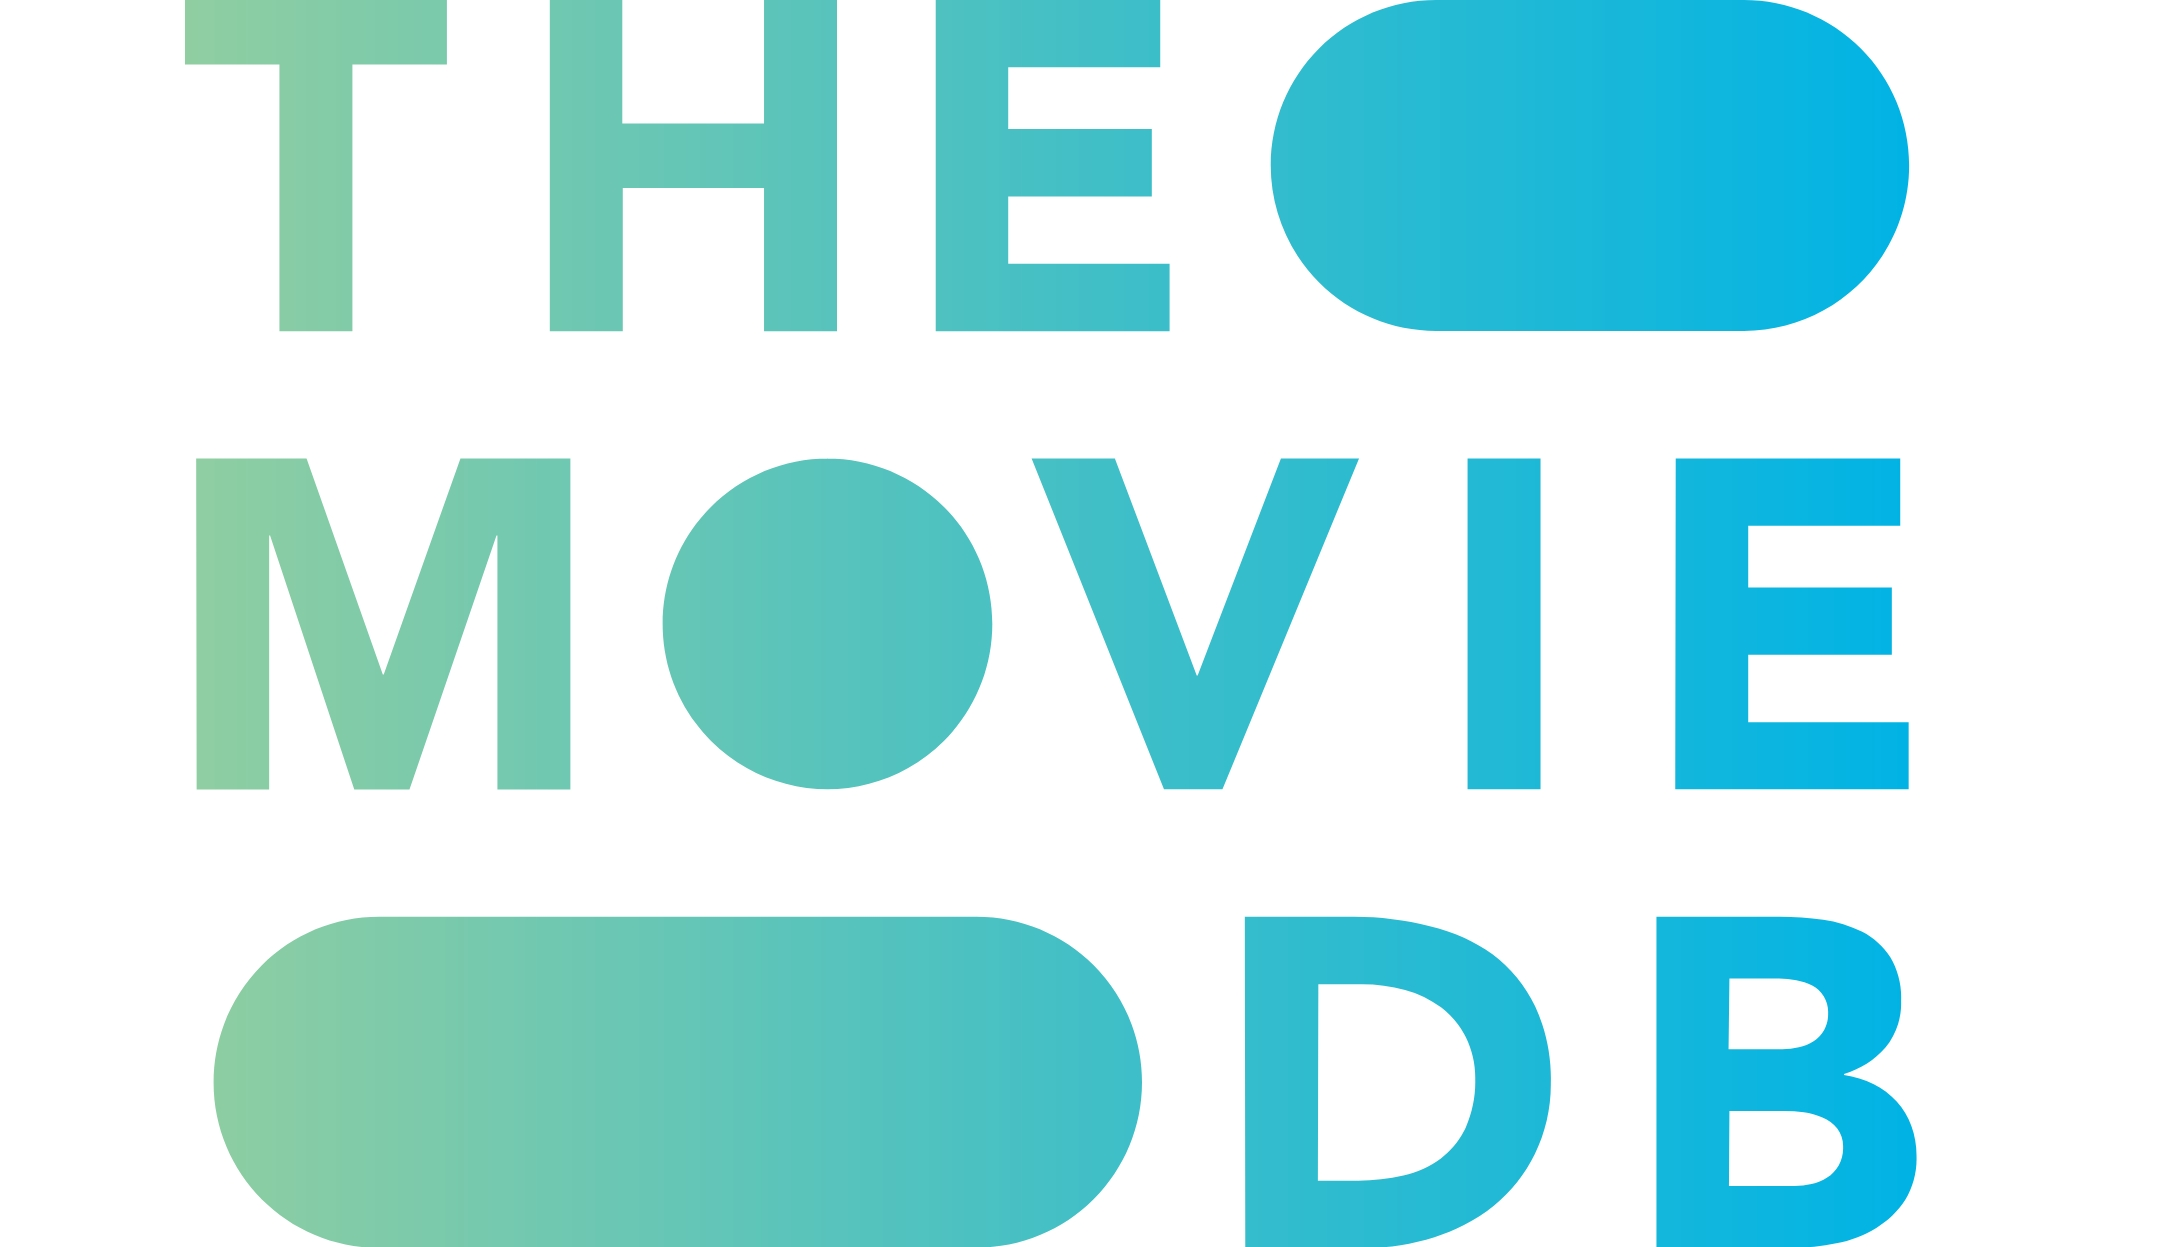

#**A - Introduction**

Welcome to the data analysis project of the TMDB 5000 Movie Dataset! This dataset contains information about more than 5000 movies from The Movie Database (TMDb), including their genres, keywords, ratings, revenues, budgets, cast and crew.

I am personally a big fan of action, adventure, fantasy, and sci-fi movies. My favorite movies include some huge franchises series like The Lord of the Ring, Harry Potter, Pirate of the Caribbean, Iron Man, The Avengers, Spider Man, Fast and Furious, etc. I am curious if the market favors such big IPs. Particularly, revenue will be the primary indicator of success.

In this project, we will explore the dataset and try to answer some interesting questions, such as: What are the most popular genres? How does the budget affect the revenue? Which actors and directors are the most successful? And more! We will use Python and various libraries to perform data cleaning, visualization and analysis. Let's get started and have some fun with movies!

**Data source**: [TMDB 5000 Movie Dataset](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/)

# **B - Problem Statements**

Here are some interesting insights we will dig into:
1. Correlations:
    - How are the other numerical columns (Budget, Popularity, Vote Count, Vote Average, Runtime) correlated with the success indicator (Revenue)?
    
2. Performances:
    - What are the top 20 movies in this dataset based on revenue, popularity, vote average, and ROI?
    - How does the performance of movies vary by genre?
    - What are the best production companies in terms of revenue, popularity, and ratings?
    - Who are the most influential directors in terms of revenue, popularity, and ratings?
    - Who are the top producers with highest revenue and profits earned?

3. Comparisons:
    - How does the average vote count and average vote differ across genres?
    - What is the relationship between Average Vote Count and Average Ratings by each genre?

4. Trends:
    - Are there any noticeable patterns or shifts in movie budgets, revenues, and popularity over time?
    - How has the number of movies released each year changed over time?

# **C - Datasets Overview**

## 1. Load Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import json # This library is to transfer some of the json-formated columns.
import ast # This library is to read a column as dict or list instead of str

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

## 2. Dataset

### 2.1 Download Dataset

**The data source contain two datasets:**

Movies, which includes detailed information of a movie's name, genre, budget, revenue, runtime, vote, etc.;

Credits, which includes information of a movie's director, casts, and crews.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2.2 Load Movies Dataset

In [ ]:
movies=pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### Dataset Info

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

**The Movies dataset has the following features:**

 - budget - The budget in which the movie was made.
 - genre - The genre of the movie, Action, Comedy ,Thriller etc.
 - homepage - A link to the homepage of the movie.
 - id - The movie_id as in the first dataset.
 - keywords - The keywords or tags related to the movie.
 - original_language - The language in which the movie was made.
 - original_title - The title of the movie before translation or adaptation.
 - overview - A brief description of the movie.
 - popularity - A numeric quantity specifying the movie popularity.
 - production_companies - The production house of the movie.
 - production_countries - The country in which it was produced.
 - release_date - The date on which it was released.
 - revenue - The worldwide revenue generated by the movie.
 - runtime - The running time of the movie in minutes.
 - spoken_languages - The languages the movie primary uses.
 - status - "Released", "Rumored" or "Post Production".
 - tagline - Movie's tagline.
 - title - Title of the movie.
 - vote_average - Average ratings the movie recieved.
 - vote_count - The count of votes recieved.

There are totally 20 columns and 4803 entries in the Movies dataset.

#### Check for null values

In [ ]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### Count the number of unique values in the `interger` columns, show the unique values and their respective number of occurrence.

In [ ]:
for column in movies.columns:
    if movies[column].dtype=='int64':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')

BUDGET : 436
0           1037
20000000     144
30000000     128
25000000     126
40000000     123
            ... 
2              1
1950000        1
1987650        1
1900000        1
9000           1
Name: budget, Length: 436, dtype: int64


ID : 4803
19995     1
1865      1
49026     1
49529     1
559       1
         ..
72766     1
231617    1
126186    1
44990     1
25975     1
Name: id, Length: 4803, dtype: int64


REVENUE : 3297
0           1427
8000000        6
7000000        6
6000000        5
12000000       5
            ... 
7808524        1
1281176        1
16             1
2074000        1
2040920        1
Name: revenue, Length: 3297, dtype: int64


VOTE_COUNT : 1609
0       62
1       53
2       46
4       43
3       41
        ..
3601     1
2562     1
2686     1
660      1
2078     1
Name: vote_count, Length: 1609, dtype: int64




1,037 movies has `0` budget, and 1,427 movies has `0` revenue.

Interestingly, many movies share the same amount of budget.



#### Count the number of unique values in the `float` columns, show the unique values and their respective number of occurrence.

In [ ]:
for column in movies.columns:
    if movies[column].dtype=='float64':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')
# A lot of movies share the same runtime and vote average scores.

POPULARITY : 4802
8.902102      2
107.376788    1
43.926995     1
115.699814    1
48.681969     1
             ..
0.642552      1
1.444476      1
0.857008      1
0.674570      1
1.929883      1
Name: popularity, Length: 4802, dtype: int64


RUNTIME : 156
90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
59.0       1
66.0       1
186.0      1
174.0      1
60.0       1
Name: runtime, Length: 156, dtype: int64


VOTE_AVERAGE : 71
6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: vote_average, Length: 71, dtype: int64




#### Count the number of unique values in the `object` columns, show the unique values and their respective number of occurrence


In [ ]:
for column in movies.columns:
    if movies[column].dtype=='object':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')

GENRES : 1175
[{"id": 18, "name": "Drama"}]                                                                                                                                       370
[{"id": 35, "name": "Comedy"}]                                                                                                                                      282
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                     164
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                    144
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                         142
                                                                                                                                                  

There are invalid entries `[]` in the text columns.

#### Check Distribution of Numeric Columns

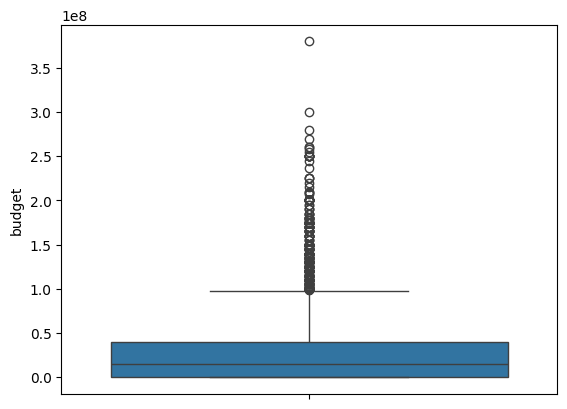

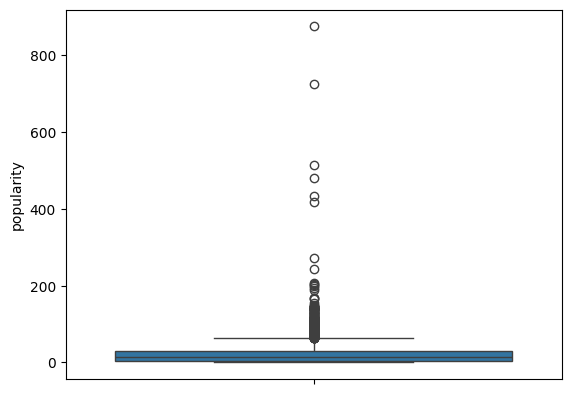

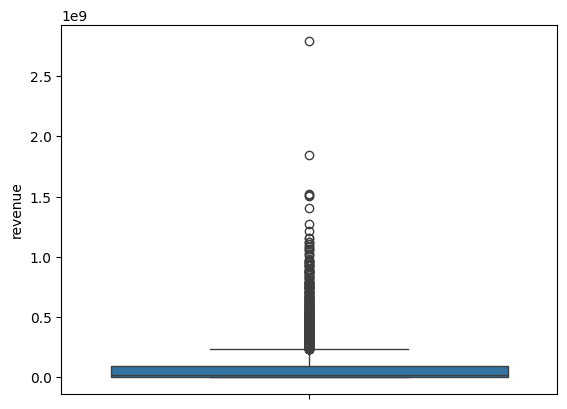

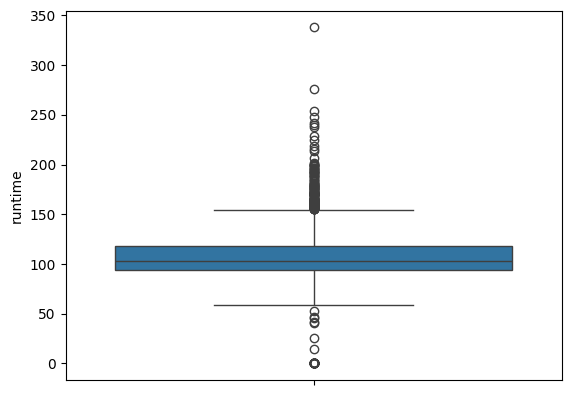

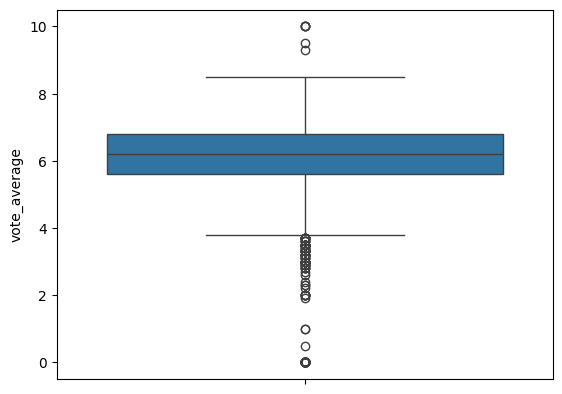

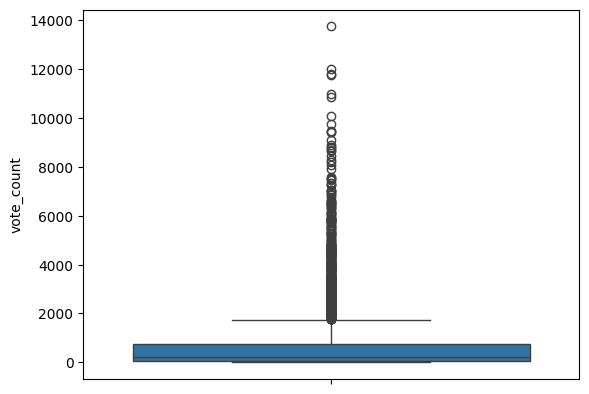

In [ ]:
numeric_columns = ['budget','popularity','revenue','runtime','vote_average','vote_count']
for column in numeric_columns:
  sns.boxplot(movies[column])
  plt.show()

As indicated by the boxplots, the numeric columns all have a lot of outliers that may require scaling.

### 2.3 Load Credits Dataset

#### Dataset Info

In [ ]:
credits=pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


The Credits dataset has the following features:

 - movie_id - The movie_id as in the first dataset.
 - title - Title of the movie.
 - cast - Actors names in the move.
 - crew - The team who created the movie.

There are totally 4 columns and 4,803 entries in the Credits dataset.

#### Check for Null Values

In [ ]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

#### Count the number of unique values in the `object` columns, show the unique values and their respective number of occurrence


In [ ]:
for column in credits.columns:
    if credits[column].dtype=='object':
        print(column.upper(),':',credits[column].nunique())
        print(credits[column].value_counts().sort_values(ascending=False))
        print('\n')

TITLE : 4800
The Host                     2
Out of the Blue              2
Batman                       2
Drag Me to Hell              1
The Dark Knight Rises        1
                            ..
Newlyweds                    1
Signed, Sealed, Delivered    1
Shanghai Calling             1
Breaking Upwards             1
My Date with Drew            1
Name: title, Length: 4800, dtype: int64


CAST : 4761
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

There are also invalid entries `[]` in the text columns.

# **D - Data Cleaning**

## 1. Movies Dataset

### 1.1 Drop Irrelevant Columns

Some of the columns are irrelevant with the problem statements, such as keywords, spoken language, homepage, overview, status, and tagline.

The column original_title has characters from different language, which adds difficulty to the analysis. So I will delete this column and keep the title column only.

In [ ]:
movies.drop(['keywords','homepage','spoken_languages','original_title','overview','status','tagline'], axis=1, inplace=True)

### 1.2 Clean Categorical Columns
As can be seen from the preview, there are `0` in the numerical columns and `[]` in the string columns, remove those rows to only include valid entries.

In [ ]:
movies = movies.loc[(movies['budget']!=0) &
      (movies['genres']!='[]') &
       (movies['popularity']!=0) &
        (movies['production_companies']!='[]') &
         (movies['production_countries']!='[]') &
          (movies['revenue']!=0) &
           (movies['runtime']!=0) &
            (movies['vote_average']!=0) &
             (movies['vote_count']!=0)]

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3183 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3183 non-null   int64  
 1   genres                3183 non-null   object 
 2   id                    3183 non-null   int64  
 3   original_language     3183 non-null   object 
 4   popularity            3183 non-null   float64
 5   production_companies  3183 non-null   object 
 6   production_countries  3183 non-null   object 
 7   release_date          3183 non-null   object 
 8   revenue               3183 non-null   int64  
 9   runtime               3183 non-null   float64
 10  title                 3183 non-null   object 
 11  vote_average          3183 non-null   float64
 12  vote_count            3183 non-null   int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 348.1+ KB


After deleting irrelevant columns and invalid entries, there are 13 columns and 3,138 entries left.

### 1.3 Transform Release Date

In [ ]:
movies['release_date']=pd.to_datetime(movies['release_date'],format='%Y-%m-%d')
movies.head(5)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,John Carter,6.1,2124


### 1.4 Parse JSON to Python String

The values in genre, production_companies, and production_countries columns are in JSON string format that need to be transformed into Python string.

One way is to create a for loop and use json library.

#### Genre

In [ ]:
for index, row in movies.iterrows(): # iterate over the rows of movies
    genres=json.loads(row['genres']) # parse the JSON string and extract a list of dictionaries
    genre_names=[i['name'] for i in genres] # use list comprehension to create a list of genre names from the list of dictionaries
    movies.at[index,'genres']=str(genre_names) # set the value of the genres column for the current row to the string of genre names

#### Production Companies

In [ ]:
for index, row in movies.iterrows():
    companies=json.loads(row['production_companies'])
    companies_name=[i['name'] for i in companies]
    movies.at[index,'production_companies']=str(companies_name)

#### Production Countries

In [ ]:
for index, row in movies.iterrows():
    countries=json.loads(row['production_countries'])
    countries_name=[i['name'] for i in countries]
    movies.at[index, 'production_countries']=str(countries_name)

### 1.5 Exclude Puncuations

In [ ]:
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['production_companies']=movies['production_companies'].str.strip('[]').str.replace("'",'').str.replace(' ','')
movies['production_countries']=movies['production_countries'].str.strip('[]').str.replace("'",'').str.replace(' ','')
movies.head(5)

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124


### 1.6 Check for invalid values:

In [ ]:
for column in movies.columns:
    if movies[column].dtype=='object':
        print(column.upper(),':',movies[column].nunique())
        print(movies[column].value_counts().sort_values(ascending=False))
        print('\n')

GENRES : 923
Drama                                   196
Comedy                                  191
Drama,Romance                            94
Comedy,Romance                           85
Comedy,Drama                             69
                                       ... 
Drama,Fantasy,Horror,Thriller             1
Drama,Thriller,Crime,Romance              1
Mystery,Horror,ScienceFiction             1
Fantasy,Drama,Horror,Action,Thriller      1
Crime,Horror,Mystery,Thriller             1
Name: genres, Length: 923, dtype: int64


ORIGINAL_LANGUAGE : 26
en    3060
fr      24
es      15
ja      13
zh      12
de       9
hi       6
ru       6
it       6
ko       5
cn       5
da       4
pt       2
id       2
nl       2
th       2
xx       1
te       1
is       1
nb       1
af       1
pl       1
he       1
ro       1
no       1
fa       1
Name: original_language, dtype: int64


PRODUCTION_COMPANIES : 2629
ParamountPictures                                                                   

### 1.7 Expand Dataset
For analysis purpose, the values in each row of the genres, production companies, and production countries columns should be seperated.

#### Genre

In [ ]:
genres=movies.assign(genres=movies['genres'].str.split(',')).explode('genres')
genres

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,Action,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,Adventure,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,Fantasy,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,ScienceFiction,19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,Adventure,285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,7000,Drama,14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658
4796,7000,Thriller,14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658
4798,220000,Action,9367,es,14.269792,ColumbiaPictures,"Mexico,UnitedStatesofAmerica",1992-09-04,2040920,81.0,El Mariachi,6.6,238
4798,220000,Crime,9367,es,14.269792,ColumbiaPictures,"Mexico,UnitedStatesofAmerica",1992-09-04,2040920,81.0,El Mariachi,6.6,238


#### Production Companies

In [ ]:
production_companies=movies.assign(production_companies=movies['production_companies'].str.split(',')).explode('production_companies')
production_companies

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,IngeniousFilmPartners,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,TwentiethCenturyFoxFilmCorporation,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,DuneEntertainment,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,LightstormEntertainment,"UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,WaltDisneyPictures,UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,Comedy,2292,en,19.748658,ViewAskewProductions,UnitedStatesofAmerica,1994-09-13,3151130,92.0,Clerks,7.4,755
4788,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110
4792,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63
4796,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658


#### Production Countries

In [ ]:
production_countries=movies.assign(production_countries=movies['production_countries'].str.split(',')).explode('production_countries')
production_countries

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...",UnitedStatesofAmerica,2009-12-10,2787965087,162.0,Avatar,7.2,11800
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...",UnitedKingdom,2009-12-10,2787965087,162.0,Avatar,7.2,11800
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24",UnitedKingdom,2015-10-26,880674609,148.0,Spectre,6.3,4466
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24",UnitedStatesofAmerica,2015-10-26,880674609,148.0,Spectre,6.3,4466
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4788,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110
4792,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63
4796,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658
4798,220000,"Action,Crime,Thriller",9367,es,14.269792,ColumbiaPictures,Mexico,1992-09-04,2040920,81.0,El Mariachi,6.6,238


## 2. Credits Dataset

### 2.1 Pull Elements from Crew
The other way is to create a function and use ast.literal_eval to convert json.

#### Directors

In [ ]:
def crew_dir(item): # define a function named crew_dir that takes an item as an argument
    dir=[] # create an empty list called dir to store the names of the directors of the movie
    for i in ast.literal_eval(item): # use the ast.literal_eval function to convert the item string from JSON format to Python list of dictionaries
        if i['job']=='Director':
            dir.append(i['name']) # use list comprehension to create a list of director names from the list of dictionaries
    return dir # returns the director list as the output of the function

Call `crew_dir` function on Credits dataframe to pull directors into a new column.

In [ ]:
credits['Director_temp']=credits['crew'].apply(crew_dir)
credits.head(5)

,movie_id,title,cast,crew,Director_temp
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski]
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan]
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton]


#### Producers

In [ ]:
def crew_prod(item):
    prod=[]
    for i in ast.literal_eval(item):
        if i['job']=='Producer':
            prod.append(i['name'])
    return prod # return the prod list as the output of the function

In [ ]:
credits['Producer_temp']=credits['crew'].apply(crew_prod)
credits.head(5)

,movie_id,title,cast,crew,Director_temp,Producer_temp
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]"
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]"
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]"
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]"


#### Top Five Actors

In [ ]:
def cast_actors(obj): # define a function named cast_actors that takes an obj as an argument
    actors=[] # create an empty list called actors to store the names of the actors of the movie
    counter=0 # create a variable called counter and set it to zero to keep track of the number of actors added to the list
    for i in ast.literal_eval(obj): # use the ast.literal_eval function to convert the item string from JSON format to Python list of dictionaries
        if counter!=5: # iterate over each dictionary in the list, and check if the counter is not equal to five.
            actors.append(i['name'])
            counter+=1  # if yes, append the value of the key ‘name’ to the actors list and increments the counter by one.
        else:
            break # if no, break out of the loop
    return actors # return the actors list as the output of the function

In [ ]:
credits['Actors_temp']=credits['cast'].apply(cast_actors)
credits.head(5)

,movie_id,title,cast,crew,Director_temp,Producer_temp,Actors_temp
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]","[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christian Bale, Michael Caine, Gary Oldman, A..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]","[Taylor Kitsch, Lynn Collins, Samantha Morton,..."


### 2.2 Convert to Python String and Remove `[]`

In [ ]:
credits['Director']=credits['Director_temp'].astype('str')
credits['Director']=credits['Director'].str.strip('[]').str.replace("'",'')

credits['Producers']=credits['Producer_temp'].astype('str')
credits['Producers']=credits['Producers'].str.strip('[]').str.replace("'",'')

credits['Actors']=credits['Actors_temp'].astype('str')
credits['Actors']=credits['Actors'].str.strip('[]').str.replace("'",'')

credits.head(5)

,movie_id,title,cast,crew,Director_temp,Producer_temp,Actors_temp,Director,Producers,Actors
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]","[Christian Bale, Michael Caine, Gary Oldman, A...",Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."


### 2.3 Rename `movie_id` to `id` for Dataset Combination

In [ ]:
credits.rename(columns={'movie_id':'id'},inplace=True)
credits.drop(['title','cast','crew','Director_temp','Producer_temp','Actors_temp'],axis=1,inplace=True)

### 2.4 Check for invalid values

In [ ]:
for column in credits.columns:
    if credits[column].dtype=='object':
        print(column.upper(),':',credits[column].nunique())
        print(credits[column].value_counts())
        print('\n')

DIRECTOR : 2417
                                          30
Steven Spielberg                          26
Woody Allen                               21
Clint Eastwood                            20
Martin Scorsese                           20
                                          ..
Joe Cornish                                1
Mark Neveldine                             1
Jon Hess                                   1
Stephen Chbosky                            1
Brian Herzlinger, Jon Gunn, Brett Winn     1
Name: Director, Length: 2417, dtype: int64


PRODUCERS : 3281
                                                                                                  1023
Neal H. Moritz                                                                                      12
Jerry Bruckheimer                                                                                   10
Brian Grazer                                                                                         9
Danny DeVito, M

### 2.5 Expand Dataset
Same with the movies dataframe, the values in each row of the directors, producers, and actors columns should be seperated.

#### Directors

In [ ]:
director=credits.assign(Director=credits['Director'].str.split(',')).explode('Director')
director

,id,Director,Producers,Actors
0,19995,James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,285,Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,206647,Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,49026,Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,49529,Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...
4800,231617,Scott Smith,Harvey Kahn,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof..."
4801,126186,Daniel Hsia,,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ..."
4802,25975,Brian Herzlinger,,"Drew Barrymore, Brian Herzlinger, Corey Feldma..."
4802,25975,Jon Gunn,,"Drew Barrymore, Brian Herzlinger, Corey Feldma..."


#### Producers

In [ ]:
producer=credits.assign(Producers=credits['Producers'].str.split(',')).explode('Producers')
producer

,id,Director,Producers,Actors
0,19995,James Cameron,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
0,19995,James Cameron,Jon Landau,"Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,285,Gore Verbinski,Jerry Bruckheimer,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
1,285,Gore Verbinski,Eric McLeod,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
1,285,Gore Verbinski,Chad Oman,"Johnny Depp, Orlando Bloom, Keira Knightley, S..."
...,...,...,...,...
4799,72766,Edward Burns,William Rexer,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca..."
4799,72766,Edward Burns,Aaron Lubin,"Edward Burns, Kerry Bishé, Marsha Dietlein, Ca..."
4800,231617,Scott Smith,Harvey Kahn,"Eric Mabius, Kristin Booth, Crystal Lowe, Geof..."
4801,126186,Daniel Hsia,,"Daniel Henney, Eliza Coupe, Bill Paxton, Alan ..."


#### Actors

In [ ]:
actor=credits.assign(Actors=credits['Actors'].str.split(',')).explode('Actors')
actor

,id,Director,Producers,Actors
0,19995,James Cameron,"James Cameron, Jon Landau",Sam Worthington
0,19995,James Cameron,"James Cameron, Jon Landau",Zoe Saldana
0,19995,James Cameron,"James Cameron, Jon Landau",Sigourney Weaver
0,19995,James Cameron,"James Cameron, Jon Landau",Stephen Lang
0,19995,James Cameron,"James Cameron, Jon Landau",Michelle Rodriguez
...,...,...,...,...
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Drew Barrymore
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Brian Herzlinger
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Corey Feldman
4802,25975,"Brian Herzlinger, Jon Gunn, Brett Winn",,Eric Roberts


# **E - Data Analysis**

## 1. Correlations:

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3183 entries, 0 to 4798
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                3183 non-null   int64         
 1   genres                3183 non-null   object        
 2   id                    3183 non-null   int64         
 3   original_language     3183 non-null   object        
 4   popularity            3183 non-null   float64       
 5   production_companies  3183 non-null   object        
 6   production_countries  3183 non-null   object        
 7   release_date          3183 non-null   datetime64[ns]
 8   revenue               3183 non-null   int64         
 9   runtime               3183 non-null   float64       
 10  title                 3183 non-null   object        
 11  vote_average          3183 non-null   float64       
 12  vote_count            3183 non-null   int64         
dtypes: datetime64[ns](

### 1.1 How are the other numerical columns (budget, popularity, vote count, vote average, runtime) correlated with the success indicator (revenue)?

As indicated in `2.2`, the numeric columns of the movies dataset have outliers and require scaling.

There are different methods of scaling, such as standardization, normalization, or percentile transformation.

Standardization, also known as Z-score normalization, centers and scales the values by subtracting the mean and dividing by the standard deviation. This makes the distribution of each variable have a mean of zero and a standard deviation of one. Standardization can be useful for algorithms that assume zero-centric data, such as principal component analysis (PCA).

Normalization, also known as Min-Max scaling, rescales the values to a range between zero and one by subtracting the minimum and dividing by the maximum. This preserves the shape of the original distribution and the relative order of the values. Normalization can be useful for algorithms that are sensitive to the scale of the input, such as k-means clustering or neural networks.

Percentile transformation, also known as rank scaling, assigns ranks to the values based on their relative position in the distribution, and then divides by the number of observations. This makes the distribution of each variable uniform between zero and one. Percentile transformation can be useful for reducing the effect of outliers or skewed distributions, and for making non-parametric comparisons.

#### Non-scaled heatmap

In [ ]:
correlation_num=movies[['budget','popularity','revenue','runtime','vote_average','vote_count']].corr()
correlation_num

,budget,popularity,revenue,runtime,vote_average,vote_count
budget,1.000000,0.427809,0.703979,0.227274,-0.038696,0.537215
popularity,0.427809,1.000000,0.599704,0.179661,0.288020,0.747323
revenue,0.703979,0.599704,1.000000,0.231452,0.187236,0.754760
runtime,0.227274,0.179661,0.231452,1.000000,0.390050,0.256265
vote_average,-0.038696,0.288020,0.187236,0.390050,1.000000,0.382774
vote_count,0.537215,0.747323,0.754760,0.256265,0.382774,1.000000


<Axes: >

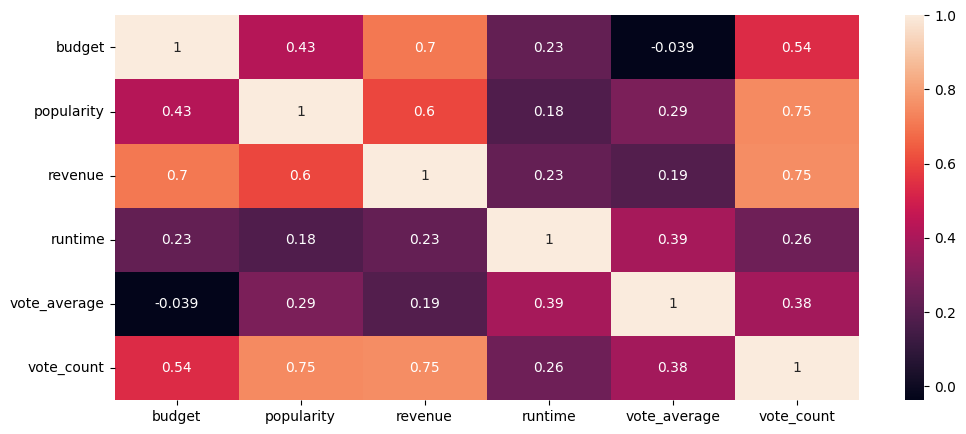

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(correlation_num,cmap="rocket",annot=True)

#### Scaled Heatmap

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer

In [ ]:
numeric_vars = ['budget','popularity','revenue','runtime','vote_average','vote_count']
movies_num = movies[numeric_vars]
movies_std = StandardScaler().fit_transform(movies_num)
movies_minmax = MinMaxScaler().fit_transform(movies_num)
movies_quantile = QuantileTransformer().fit_transform(movies_num)
movies_std = pd.DataFrame(movies_std, columns=numeric_vars)
movies_minmax = pd.DataFrame(movies_minmax, columns=numeric_vars)
movies_quantile = pd.DataFrame(movies_quantile, columns=numeric_vars)
movies_std_cor = movies_std.corr()
movies_minmax_cor = movies_minmax.corr()
movies_quantile_cor = movies_quantile.corr()

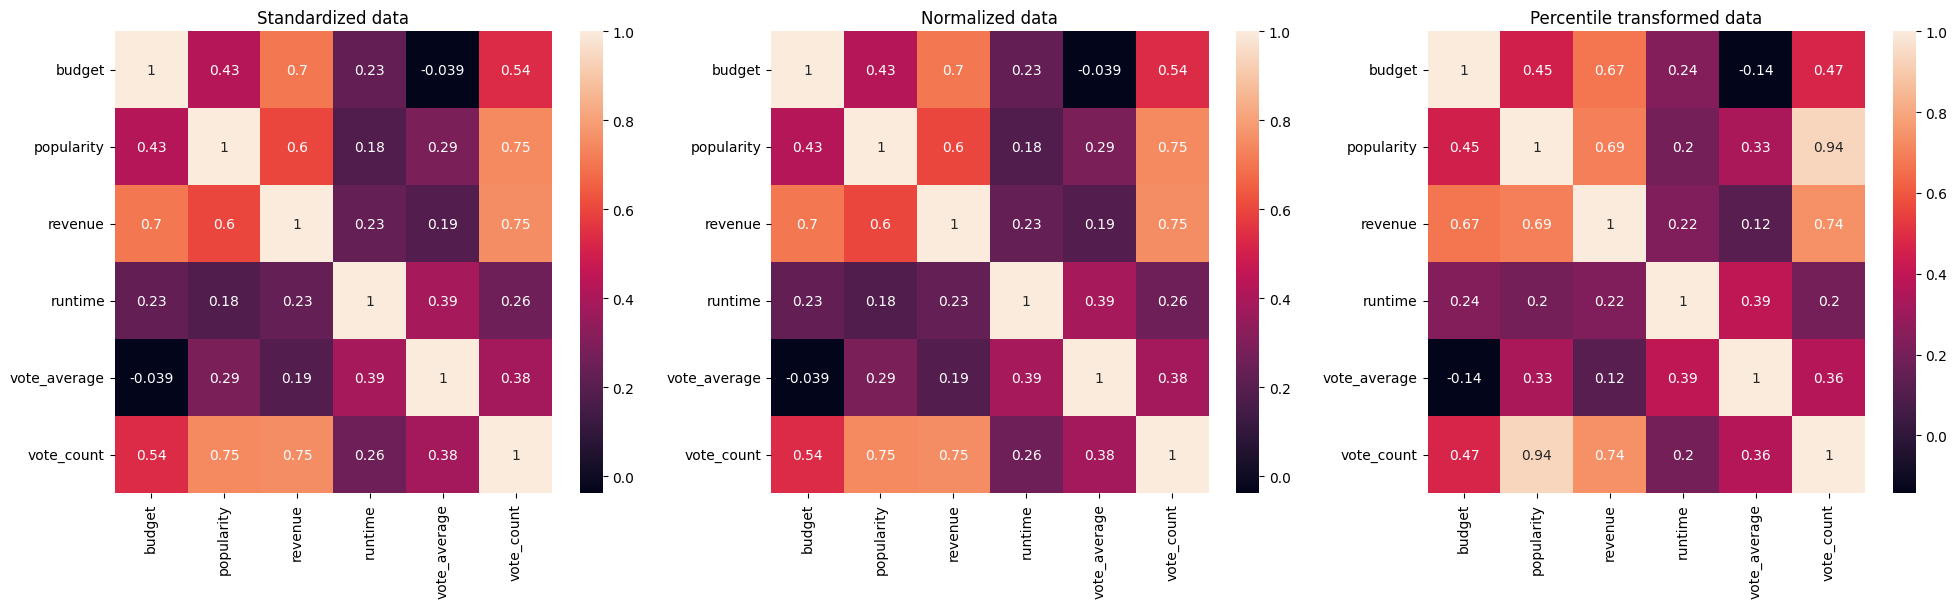

In [ ]:
plt.figure(figsize=(24,6))

plt.subplot(1,3,1)
sns.heatmap(movies_std_cor, cmap="rocket", annot=True)
plt.title("Standardized data")

plt.subplot(1,3,2)
sns.heatmap(movies_minmax_cor, cmap="rocket", annot=True)
plt.title("Normalized data")

plt.subplot(1,3,3)
sns.heatmap(movies_quantile_cor, cmap="rocket", annot=True)
plt.title("Percentile transformed data")

plt.show()

The standardized data and normalized data show the same outcomes with the non-scaled heatmap while the percentile transformed data shows quite different results. Judging from the descriptions of the transformation methods and the distribution of out data, I choose the percentile transformed data.

#### 💡Key Insights
From the heatmap, we can see that the variables that have the strongest positive correlation with revenue are `budget` (0.75), `popularity` (0.76), and `vote count` (0.79). This means that movies with higher budgets, popularity, and vote counts tend to have higher revenues. On the other hand, the variables that have the weakest correlation with revenue are `runtime` (0.31) and `vote average` (0.25). This means that movies with longer runtimes or higher ratings do not necessarily have higher revenues.

## 2. Performances:
  - What are the top 20 movies in this dataset based on revenue, popularity, vote average, and ROI?
  - How does the performance of movies vary by genre?
  - What are the best production companies in terms of revenue, popularity, and ratings?
  - Who are the most influential directors in terms of revenue, popularity, and ratings?
  - Who are the top producers with highest revenue and profits earned?


###2.1 What are the top 50 movies based on revenue, popularity, vote average, and ROI?

In [ ]:
revenue50=movies.sort_values(by='revenue',ascending=False).head(50)
popu50=movies.sort_values(by='popularity',ascending=False).head(50)
voteavg50=movies.sort_values(by='vote_average',ascending=False).head(50)
movies['ROI']=(movies['revenue']-movies['budget'])/movies['budget'] # add a column named ROI
roi50=movies.sort_values(by='ROI',ascending=False).head(50)

#### Barplots

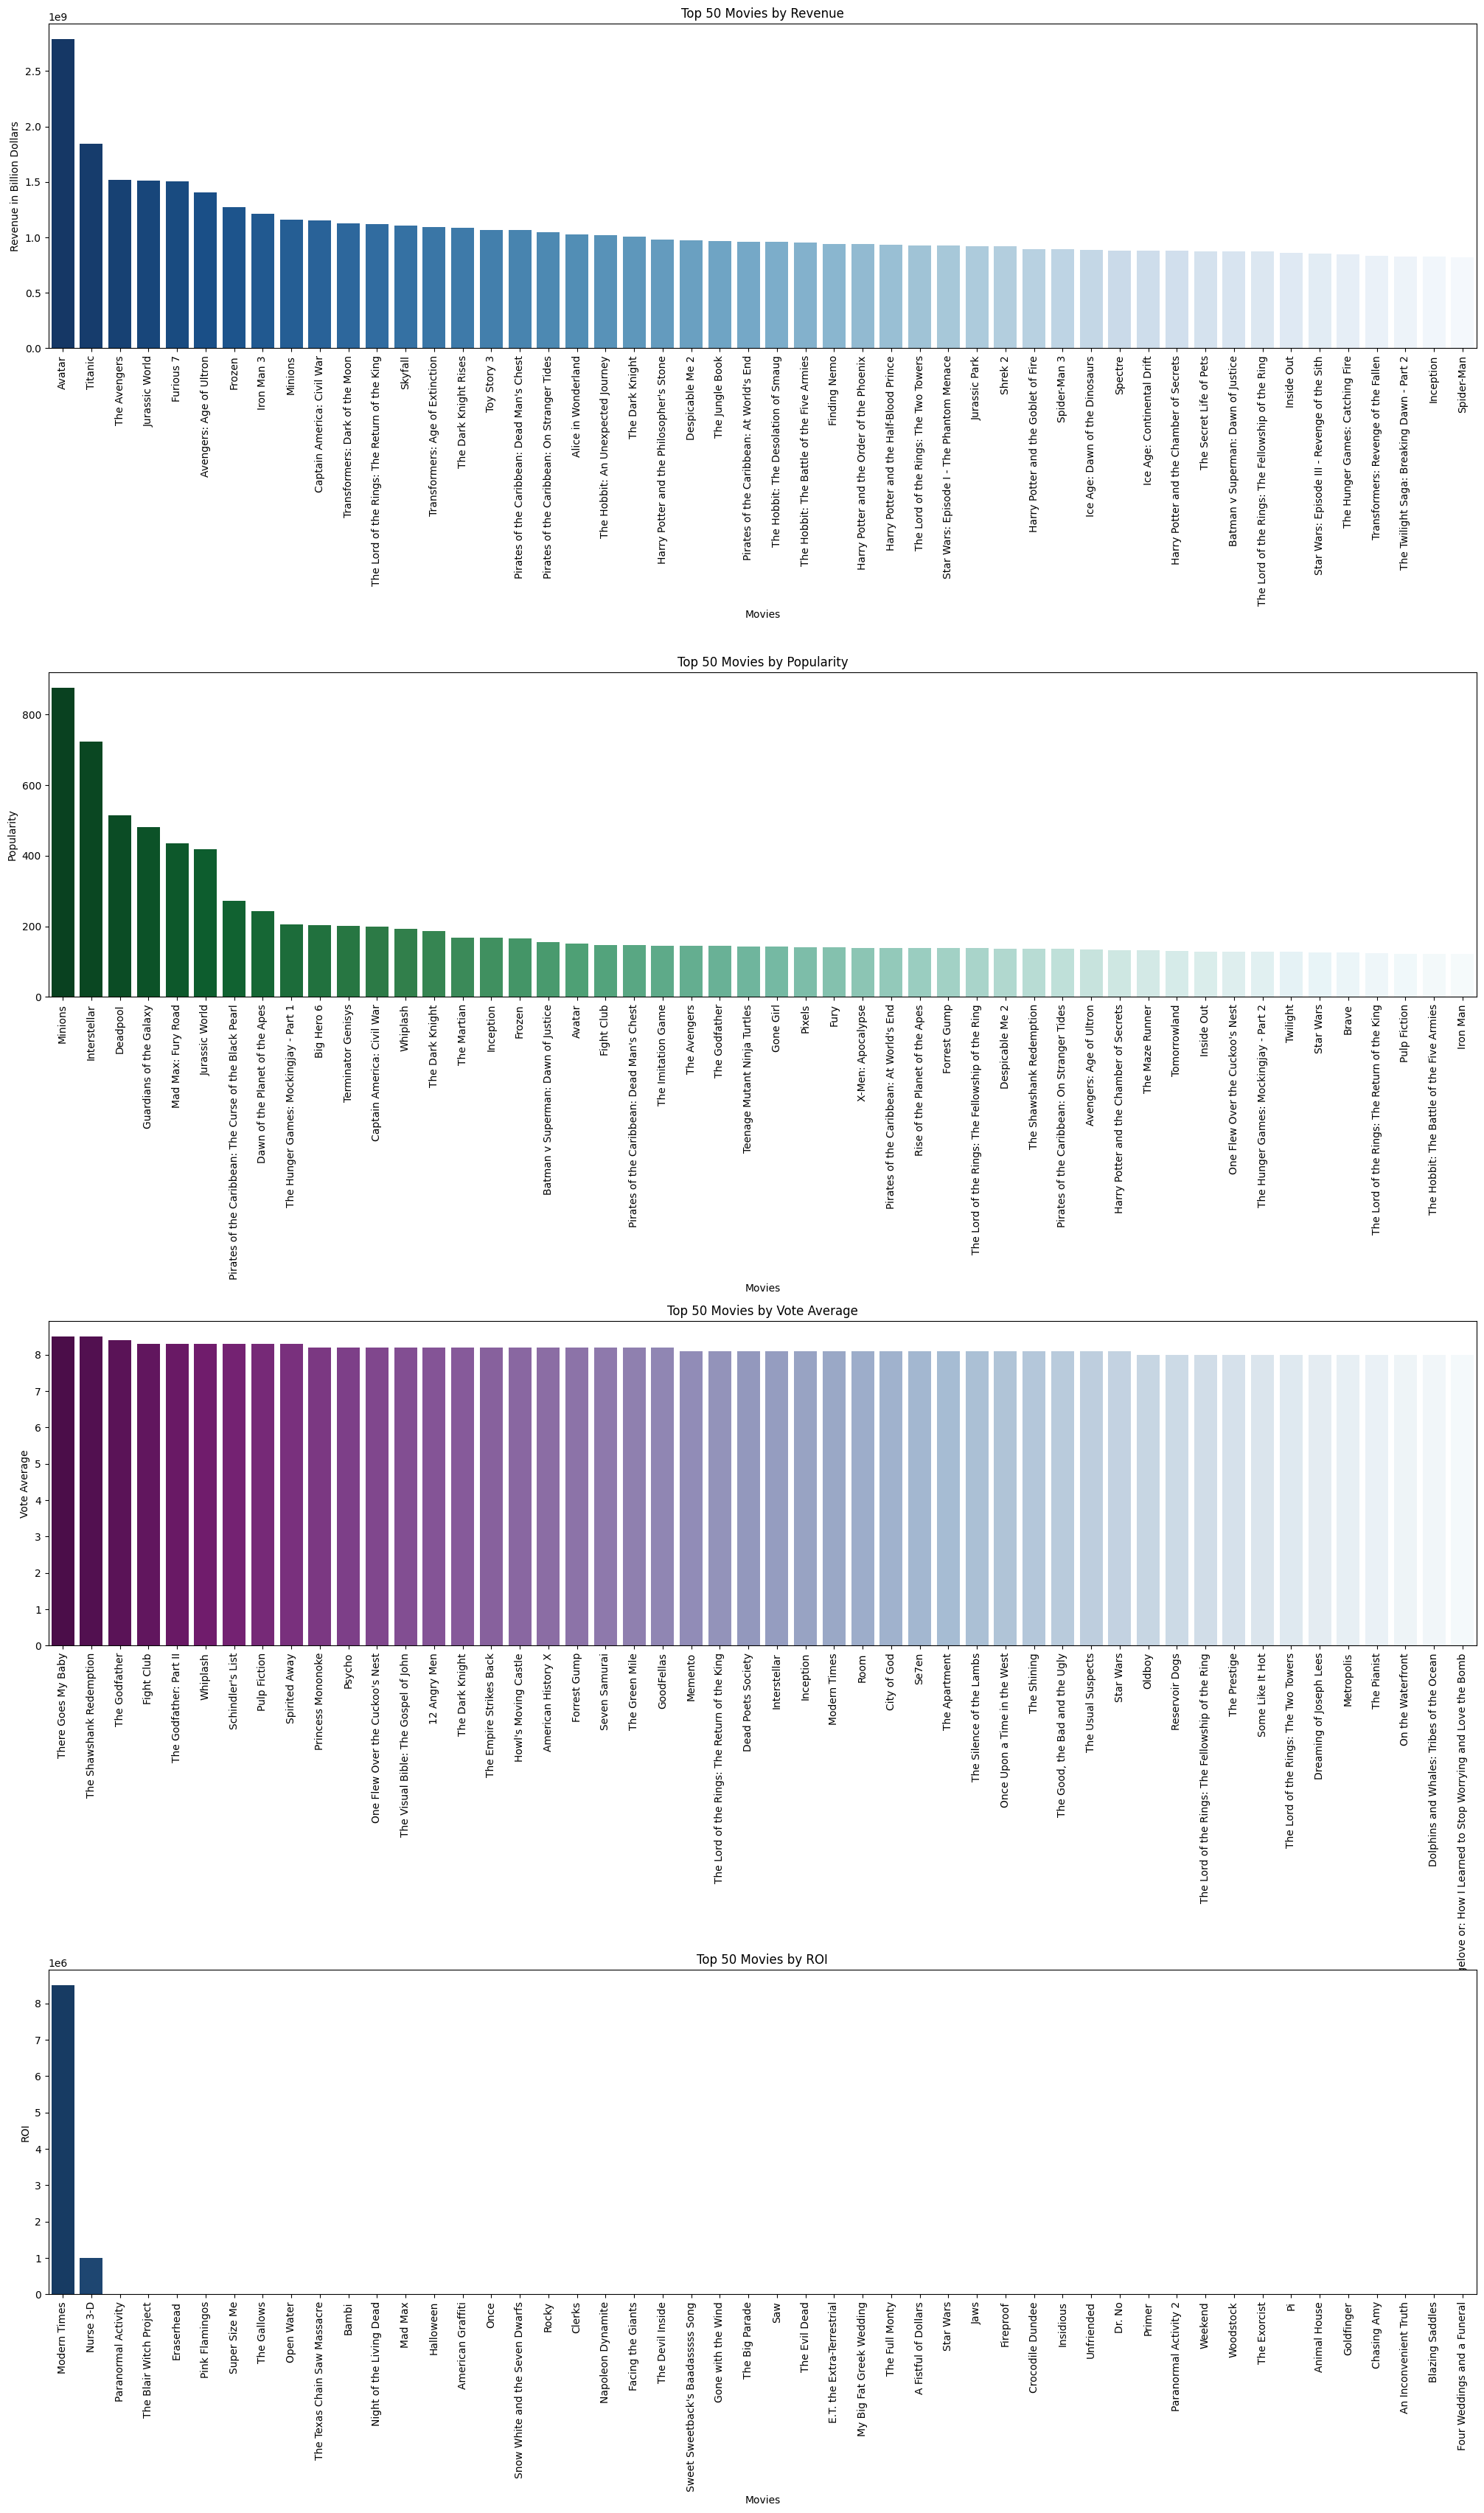

In [ ]:
from matplotlib.ticker import MultipleLocator
fig,axs=plt.subplots(nrows=4,ncols=1,figsize=(25,40))

fig_revenue50=sns.barplot(data=revenue50,x='title',y='revenue',ax=axs[0],palette='Blues_r',hue='title',legend=False)
axs[0].set_title('Top 50 Movies by Revenue')
axs[0].set_ylabel('Revenue in Billion Dollars')
axs[0].set_xlabel('Movies')
axs[0].tick_params(axis='x',rotation=90)

fig_popu50=sns.barplot(data=popu50,x='title',y='popularity',ax=axs[1],palette='BuGn_r',hue='title',legend=False)
axs[1].set_title('Top 50 Movies by Popularity')
axs[1].set_ylabel('Popularity')
axs[1].set_xlabel('Movies')
axs[1].tick_params(axis='x',rotation=90)

fig_voteavg50=sns.barplot(data=voteavg50,x='title',y='vote_average',ax=axs[2],palette='BuPu_r',hue='title',legend=False)
axs[2].set_title('Top 50 Movies by Vote Average')
axs[2].set_ylabel('Vote Average')
axs[2].set_xlabel('Movies')
axs[2].tick_params(axis='x',rotation=90)

fig_roi50=sns.barplot(data=roi50,x='title',y='ROI',ax=axs[3],palette='RdBu_r',hue='title',legend=False)
axs[3].set_title('Top 50 Movies by ROI')
axs[3].set_ylabel('ROI')
axs[3].set_xlabel('Movies')
axs[3].tick_params(axis='x',rotation=90)

plt.subplots_adjust(wspace=0.5,hspace=1)

#### 💡Key Insights
**Top Movies:** The most successful movies in terms of revenue, popularity, and vote average are `Fight Club`, `The Dark Knight`, `The Lord of the Rings: The Return of the King`, `Inception`, and `Star Wars`.

**Revenue vs Popularity:** The movies with the highest revenue are not necessarily the most popular ones. Most of the top movies in both terms are big IPs. While many big franchises, such as `Pirates of the Caribben`, `The Avengers`, `The Dark Knight`, `The Lord of the Rings`, perform pretty well in both terms, other IPs like `Harry Potter`, `Transformers`, `Hunger Games` perform well either in revenue or in popularity.

**Popularity vs Vote Average:** Some movies with the highest popularity are also included in the highly rated list. But the big franchises do not seem to be favored by the voters.

**ROI:** Movies with the highest ROIs form a complete different list from the other lists. Most of them are small movies with lower budgets.


###2.2 How does the performance of movies vary by genre?

In [ ]:
genre_revenue=genres.groupby('genres').agg({'revenue': 'sum'}).sort_values(by='revenue',ascending=False).reset_index()
genre_popu=genres.groupby('genres').agg({'popularity': 'sum'}).sort_values(by='popularity',ascending=False).reset_index()
genre_voteavg=genres.groupby('genres').agg({'vote_average': 'mean'}).sort_values(by='vote_average',ascending=False).reset_index()
genres['ROI']=(genres['revenue']-genres['budget'])/genres['budget']
genre_roi=genres.groupby('genres').agg({'ROI': 'sum'}).sort_values(by='ROI',ascending=False).reset_index()

#### Barplots

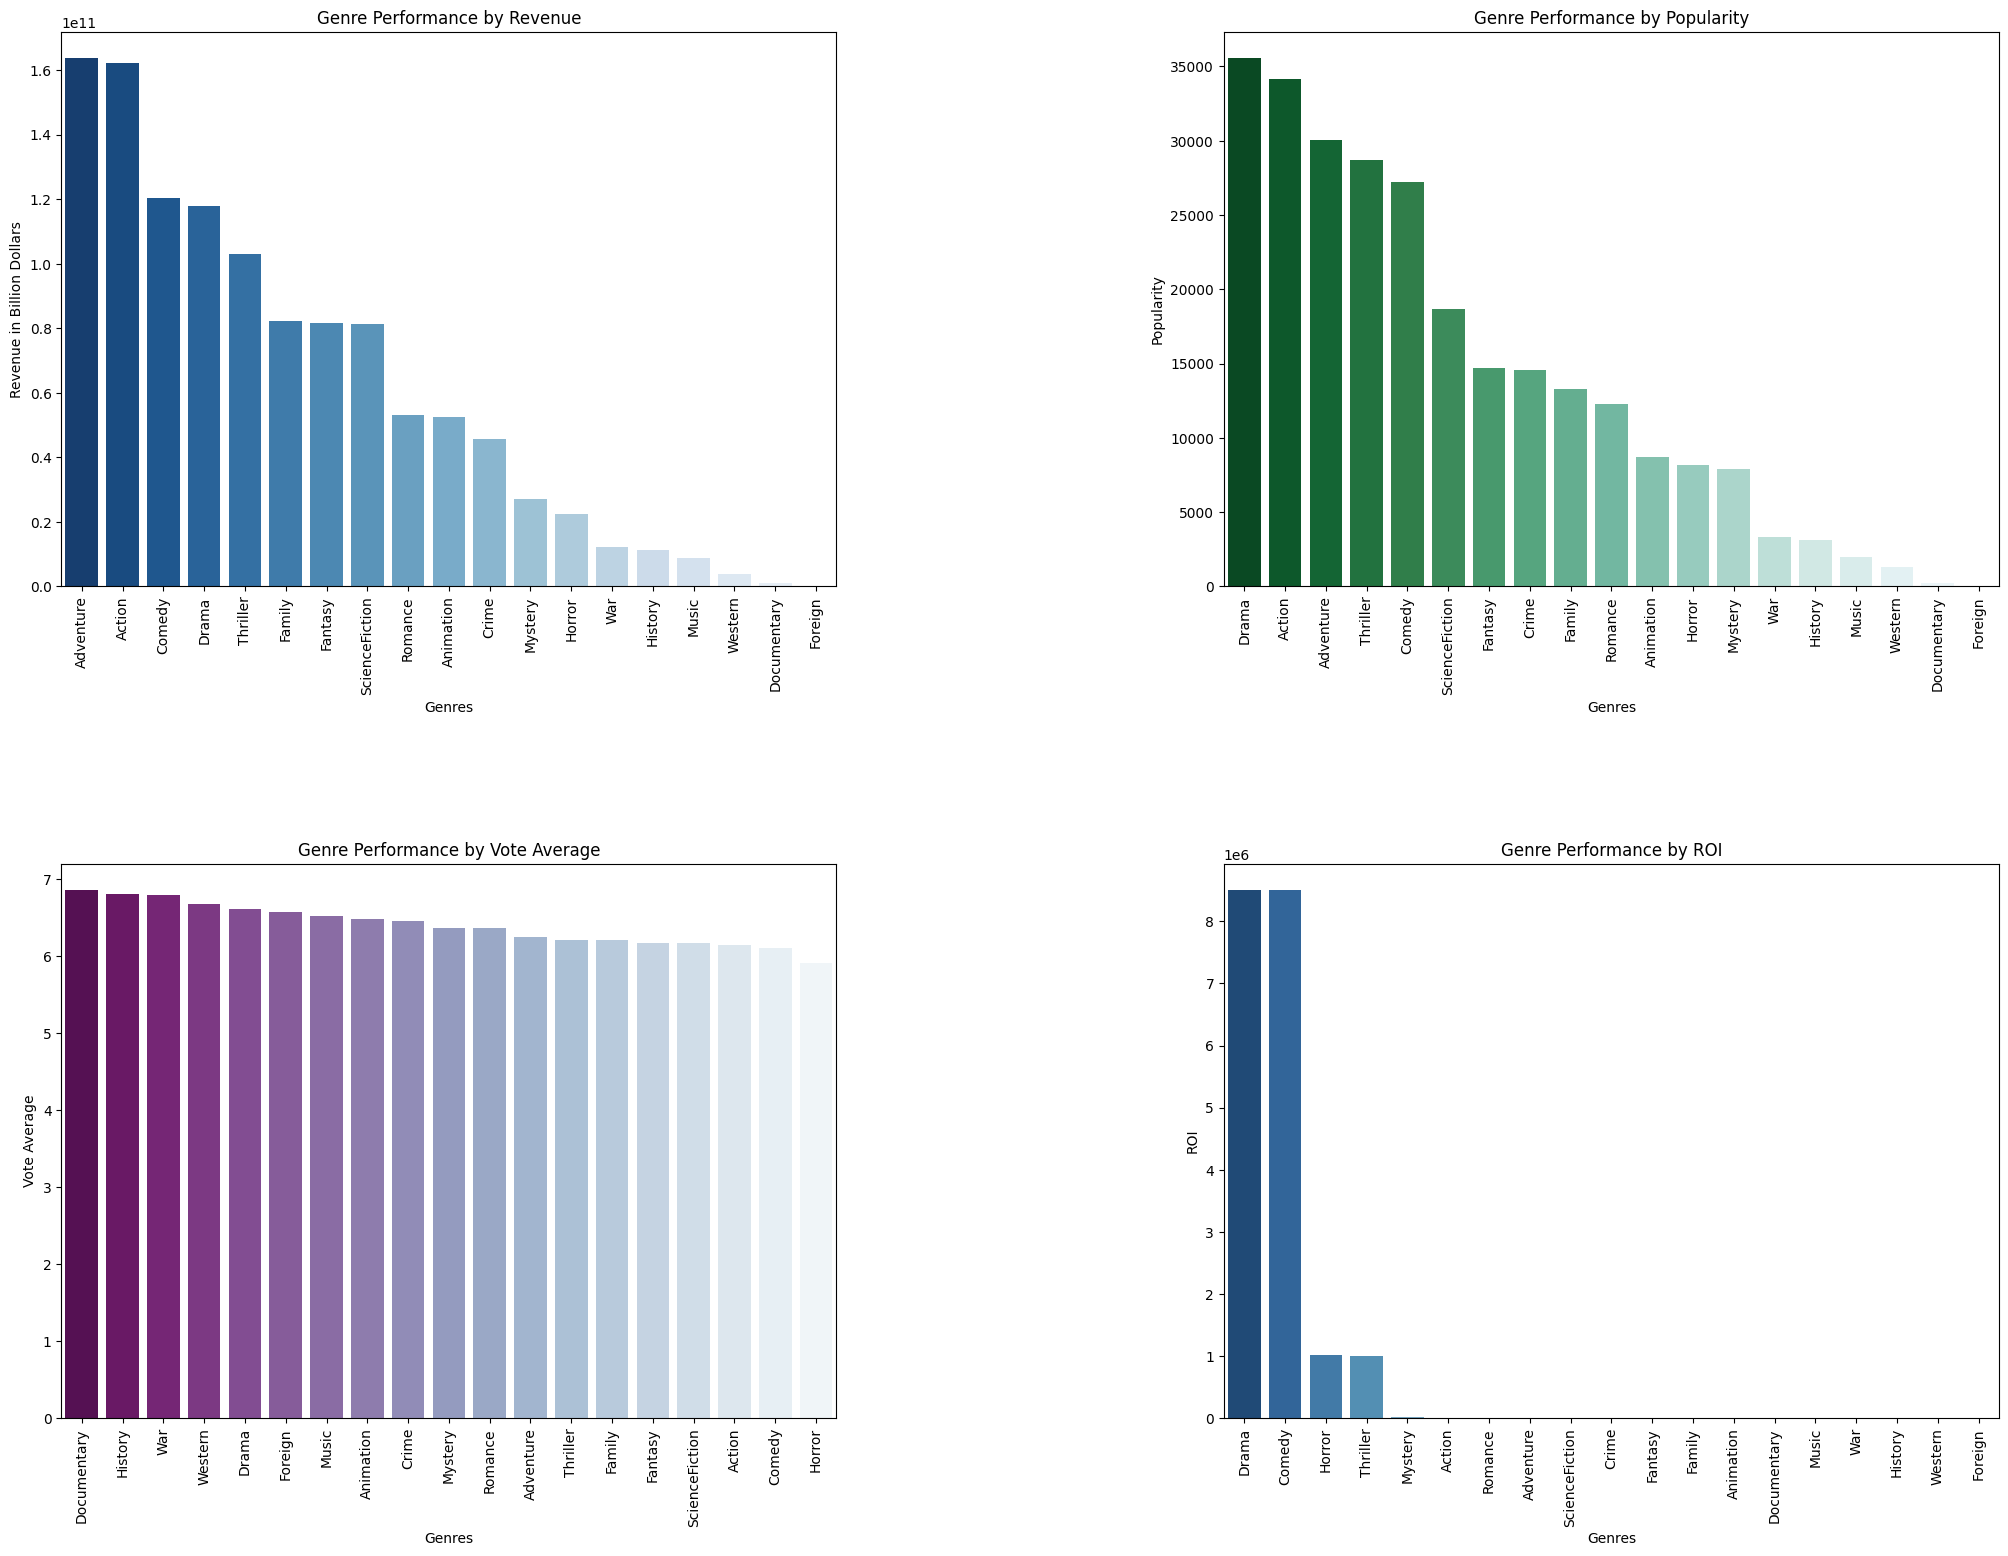

In [ ]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(25, 18))

fig_genre_revenue=sns.barplot(data=genre_revenue,x='genres',y='revenue',ax=axs[0,0],palette='Blues_r')
axs[0,0].set_title('Genre Performance by Revenue')
axs[0,0].set_ylabel('Revenue in Billion Dollars')
axs[0,0].set_xlabel('Genres')
axs[0,0].tick_params(axis='x',rotation=90)

fig_genre_popu=sns.barplot(data=genre_popu,x='genres',y='popularity',ax=axs[0,1],palette='BuGn_r')
axs[0,1].set_title('Genre Performance by Popularity')
axs[0,1].set_ylabel('Popularity')
axs[0,1].set_xlabel('Genres')
axs[0,1].tick_params(axis='x',rotation=90)

fig_genre_voteavg=sns.barplot(data=genre_voteavg,x='genres',y='vote_average',ax=axs[1,0],palette='BuPu_r')
axs[1,0].set_title('Genre Performance by Vote Average')
axs[1,0].set_ylabel('Vote Average')
axs[1,0].set_xlabel('Genres')
axs[1,0].tick_params(axis='x',rotation=90)

fig_genre_roi=sns.barplot(data=genre_roi,x='genres',y='ROI',ax=axs[1,1],palette='RdBu_r')
axs[1,1].set_title('Genre Performance by ROI')
axs[1,1].set_ylabel('ROI')
axs[1,1].set_xlabel('Genres')
axs[1,1].tick_params(axis='x',rotation=90)

plt.subplots_adjust(wspace=0.5,hspace=0.5)

#### 💡Key Insights
`Adventure` and `Action` movies earn the most and are the most popular genres. But when it comes to vote average, their rankings fall short of `Documentary` and `History`. `Comedy` and `Drama` can also generate more revenue, stay popular, and most importantly, have significantly high ROI than other genres.

As for my favorite genres, `Adventure`, `Action`, `Fantasy`, and `Science Fiction` performs well in terms of revenue and popularity.

###2.3 What are the top production companies in terms of revenue, popularity, and ratings? What are the relationships between total revenue and movies produced, popularity for them?

#### Top 20 Companies by Total Revenue

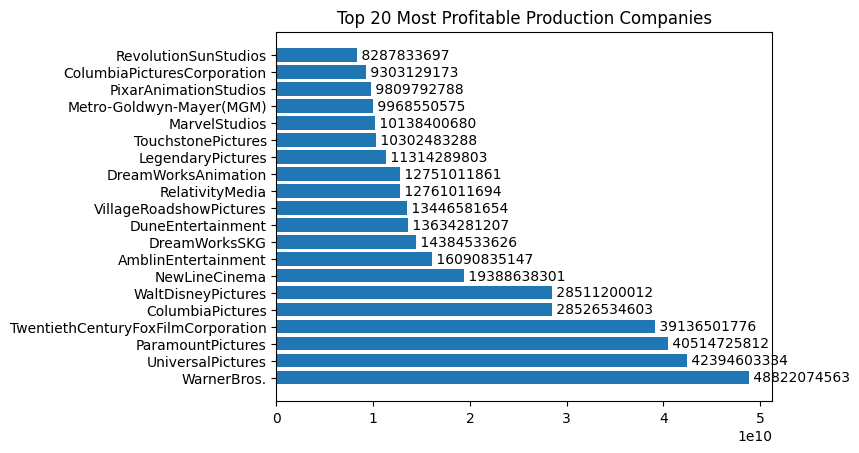

In [ ]:
grouped_revenue = production_companies.groupby('production_companies')['revenue'].sum().sort_values(ascending = False).head(20)
plt.barh(grouped_revenue.index, grouped_revenue.values)
plt.title('Top 20 Most Profitable Production Companies')
for i, count in enumerate(grouped_revenue.values):
    plt.text(count, i, f' {count}', va='center')
plt.show()

####Top 20 Companies by Movies Produced

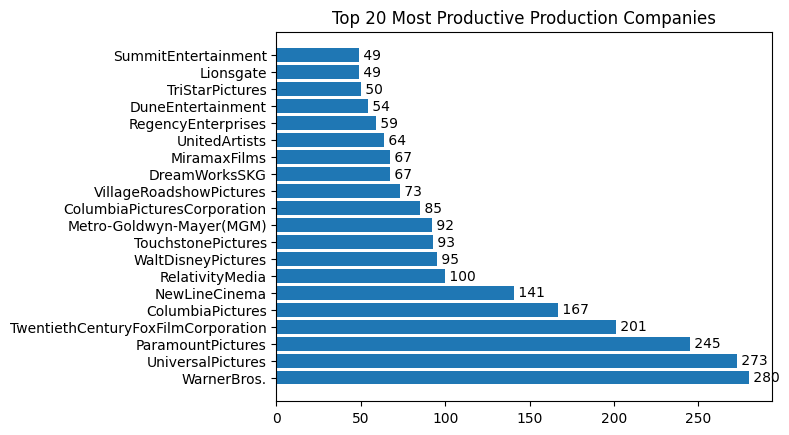

In [ ]:
total_production = production_companies.groupby('production_companies')['title'].count().sort_values(ascending = False).head(20)
plt.barh(total_production.index, total_production.values)
plt.title('Top 20 Most Productive Production Companies')
for i, count in enumerate(total_production.values):
    plt.text(count, i, f' {count}', va='center')
plt.show()

####Top 20 Companies with Highest Average Popularity

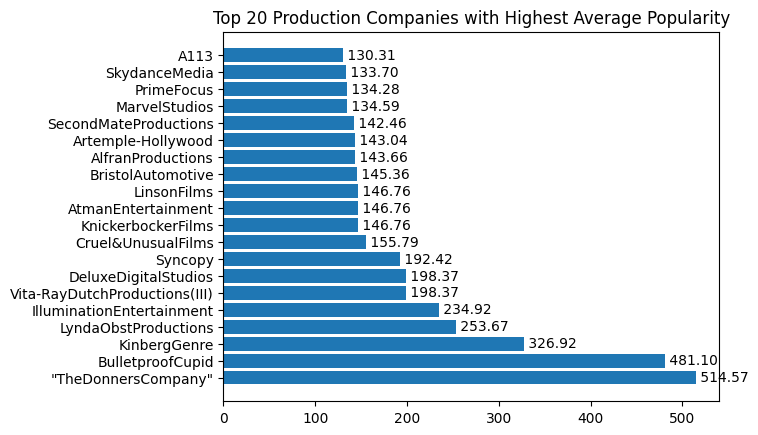

In [ ]:
# plot top 20 companies with highest average popularity
average_popularity = production_companies.groupby('production_companies')['popularity'].mean().sort_values(ascending = False).head(20)
plt.barh(average_popularity.index, average_popularity.values)
plt.title('Top 20 Production Companies with Highest Average Popularity')
for i, count in enumerate(average_popularity.values):
    plt.text(count, i, f' {count:.2f}', va='center')
plt.show()

####Scatter Plot for Revenue vs. Movies Produced

In [ ]:
# combine the top 20 most profitable production companies with the top 20 most productive ones
top_20 = pd.concat([grouped_revenue, total_production]).index.unique()
top_20_production_companies = production_companies[production_companies['production_companies'].isin(top_20)]
top_20_data = top_20_production_companies.groupby('production_companies').agg({'revenue': 'sum', 'title': 'count'}).reset_index()

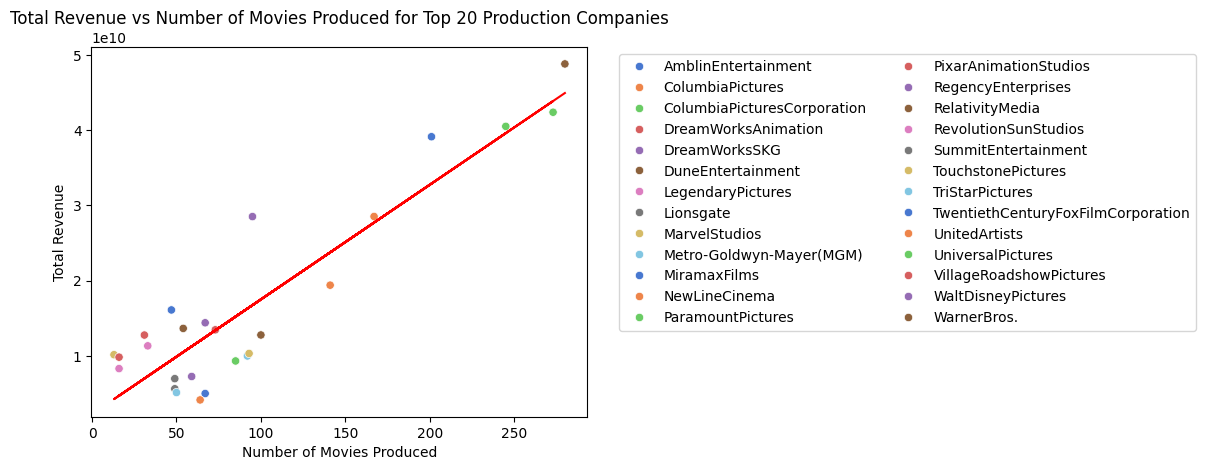

In [ ]:
# plot the relationship between the two and fit a line to the data
sns.scatterplot(data=top_20_data, x='title', y='revenue', hue='production_companies', palette='muted')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', ncol=2)
plt.xlabel('Number of Movies Produced')
plt.ylabel('Total Revenue')
plt.title('Total Revenue vs Number of Movies Produced for Top 20 Production Companies')
slope, intercept, r_value, p_value, std_err = stats.linregress(top_20_data['title'], top_20_data['revenue'])
plt.plot(top_20_data['title'], intercept + slope * top_20_data['title'], 'r', label='fitted line')
plt.show()

#### Scatter Plot for Revenue vs. Average Popularity

In [ ]:
# calculate the total revenues for the top 20 production companies with highest average popularity
top_20_1 = average_popularity.index
top_20_production_companies_1 = production_companies[production_companies['production_companies'].isin(top_20_1)]
top_20_data_1 = top_20_production_companies_1.groupby('production_companies').agg({'revenue': 'sum', 'popularity': 'mean'}).reset_index()

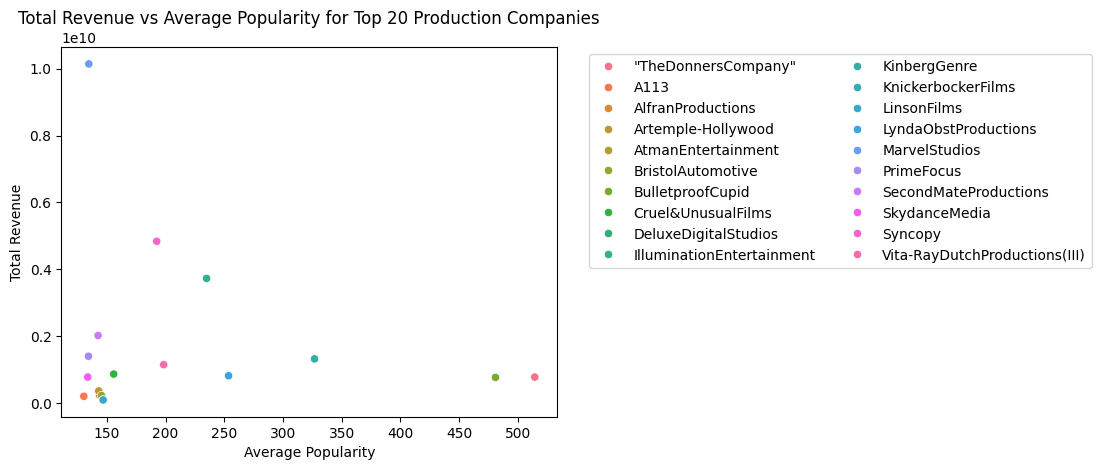

In [ ]:
# plot the data
sns.scatterplot(data=top_20_data_1, x='popularity', y='revenue', hue='production_companies')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', ncol=2)
plt.xlabel('Average Popularity')
plt.ylabel('Total Revenue')
plt.title('Total Revenue vs Average Popularity for Top 20 Production Companies')
plt.show()

#### 💡Key Insights

There is a strong positive relationship between number of movies produced and revenue, which makes total sense. The most productive compannies are all big and famous corporations, like `Warner Brothers`, `Walt Disney`, `Universal`, `Paramount`, and `Twentieth Century Fox`. But when it comes to popularity, the list becomes totally different, and the relationship between revenue and popularity is less apparent. The only company that earns both money and popularity is `Marvel Studio`, which stands out with its Marvel Universe and superhero movies. Personally, I think the Avengers series starting from `Iron Man` to `Avengers: Endgame` is quite a success. I would sometimes love to go over the series again and again for Tony Stark and Steven Rogers.

###2.4 Who are the most influential directors in terms of revenue, popularity, and ratings?

#### Combine Dataframes

In [ ]:
mergedata=pd.merge(left=movies,right=credits,how='inner',on='id')
mergedata

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,Director,Producers,Actors
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800,James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466,Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124,Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,27000,Comedy,2292,en,19.748658,"MiramaxFilms,ViewAskewProductions",UnitedStatesofAmerica,1994-09-13,3151130,92.0,Clerks,7.4,755,Kevin Smith,"Kevin Smith, Scott Mosier","""Brian OHalloran"", Jeff Anderson, Jason Mewes,..."
3179,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110,John Waters,John Waters,"Divine, David Lochary, Mary Vivian Pearce, Min..."
3180,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63,Kiyoshi Kurosawa,,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,..."
3181,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658,Shane Carruth,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A..."


#### Expand Dataframe for Individual Directors

In [ ]:
director=mergedata.assign(Director=mergedata['Director'].str.split(',')).explode('Director')
director

,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,Director,Producers,Actors
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",19995,en,150.437577,"IngeniousFilmPartners,TwentiethCenturyFoxFilmC...","UnitedStatesofAmerica,UnitedKingdom",2009-12-10,2787965087,162.0,Avatar,7.2,11800,James Cameron,"James Cameron, Jon Landau","Sam Worthington, Zoe Saldana, Sigourney Weaver..."
1,300000000,"Adventure,Fantasy,Action",285,en,139.082615,"WaltDisneyPictures,JerryBruckheimerFilms,Secon...",UnitedStatesofAmerica,2007-05-19,961000000,169.0,Pirates of the Caribbean: At World's End,6.9,4500,Gore Verbinski,"Jerry Bruckheimer, Eric McLeod, Chad Oman, Pet...","Johnny Depp, Orlando Bloom, Keira Knightley, S..."
2,245000000,"Action,Adventure,Crime",206647,en,107.376788,"ColumbiaPictures,Danjaq,B24","UnitedKingdom,UnitedStatesofAmerica",2015-10-26,880674609,148.0,Spectre,6.3,4466,Sam Mendes,"Barbara Broccoli, Michael G. Wilson","Daniel Craig, Christoph Waltz, Léa Seydoux, Ra..."
3,250000000,"Action,Crime,Drama,Thriller",49026,en,112.312950,"LegendaryPictures,WarnerBros.,DCEntertainment,...",UnitedStatesofAmerica,2012-07-16,1084939099,165.0,The Dark Knight Rises,7.6,9106,Christopher Nolan,"Charles Roven, Christopher Nolan, Emma Thomas","Christian Bale, Michael Caine, Gary Oldman, An..."
4,260000000,"Action,Adventure,ScienceFiction",49529,en,43.926995,WaltDisneyPictures,UnitedStatesofAmerica,2012-03-07,284139100,132.0,John Carter,6.1,2124,Andrew Stanton,"Colin Wilson, Jim Morris, Lindsey Collins","Taylor Kitsch, Lynn Collins, Samantha Morton, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,27000,Comedy,2292,en,19.748658,"MiramaxFilms,ViewAskewProductions",UnitedStatesofAmerica,1994-09-13,3151130,92.0,Clerks,7.4,755,Kevin Smith,"Kevin Smith, Scott Mosier","""Brian OHalloran"", Jeff Anderson, Jason Mewes,..."
3179,12000,"Horror,Comedy,Crime",692,en,4.553644,DreamlandProductions,UnitedStatesofAmerica,1972-03-12,6000000,93.0,Pink Flamingos,6.2,110,John Waters,John Waters,"Divine, David Lochary, Mary Vivian Pearce, Min..."
3180,20000,"Crime,Horror,Mystery,Thriller",36095,ja,0.212443,DaieiStudios,Japan,1997-11-06,99000,111.0,Cure,7.4,63,Kiyoshi Kurosawa,,"Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki,..."
3181,7000,"ScienceFiction,Drama,Thriller",14337,en,23.307949,Thinkfilm,UnitedStatesofAmerica,2004-10-08,424760,77.0,Primer,6.9,658,Shane Carruth,Shane Carruth,"Shane Carruth, David Sullivan, Casey Gooden, A..."


#### Top 10 Directors by Revenue, Popularity, and Vote Average

In [ ]:
director_revenue10=director.groupby('Director')['revenue'].sum().sort_values(ascending=False).head(10).reset_index()
director_popu10=director.groupby('Director')['popularity'].sum().sort_values(ascending=False).head(10).reset_index()
director_voteavg10=director.groupby('Director')['vote_average'].sum().sort_values(ascending=False).head(10).reset_index()

####Barplots

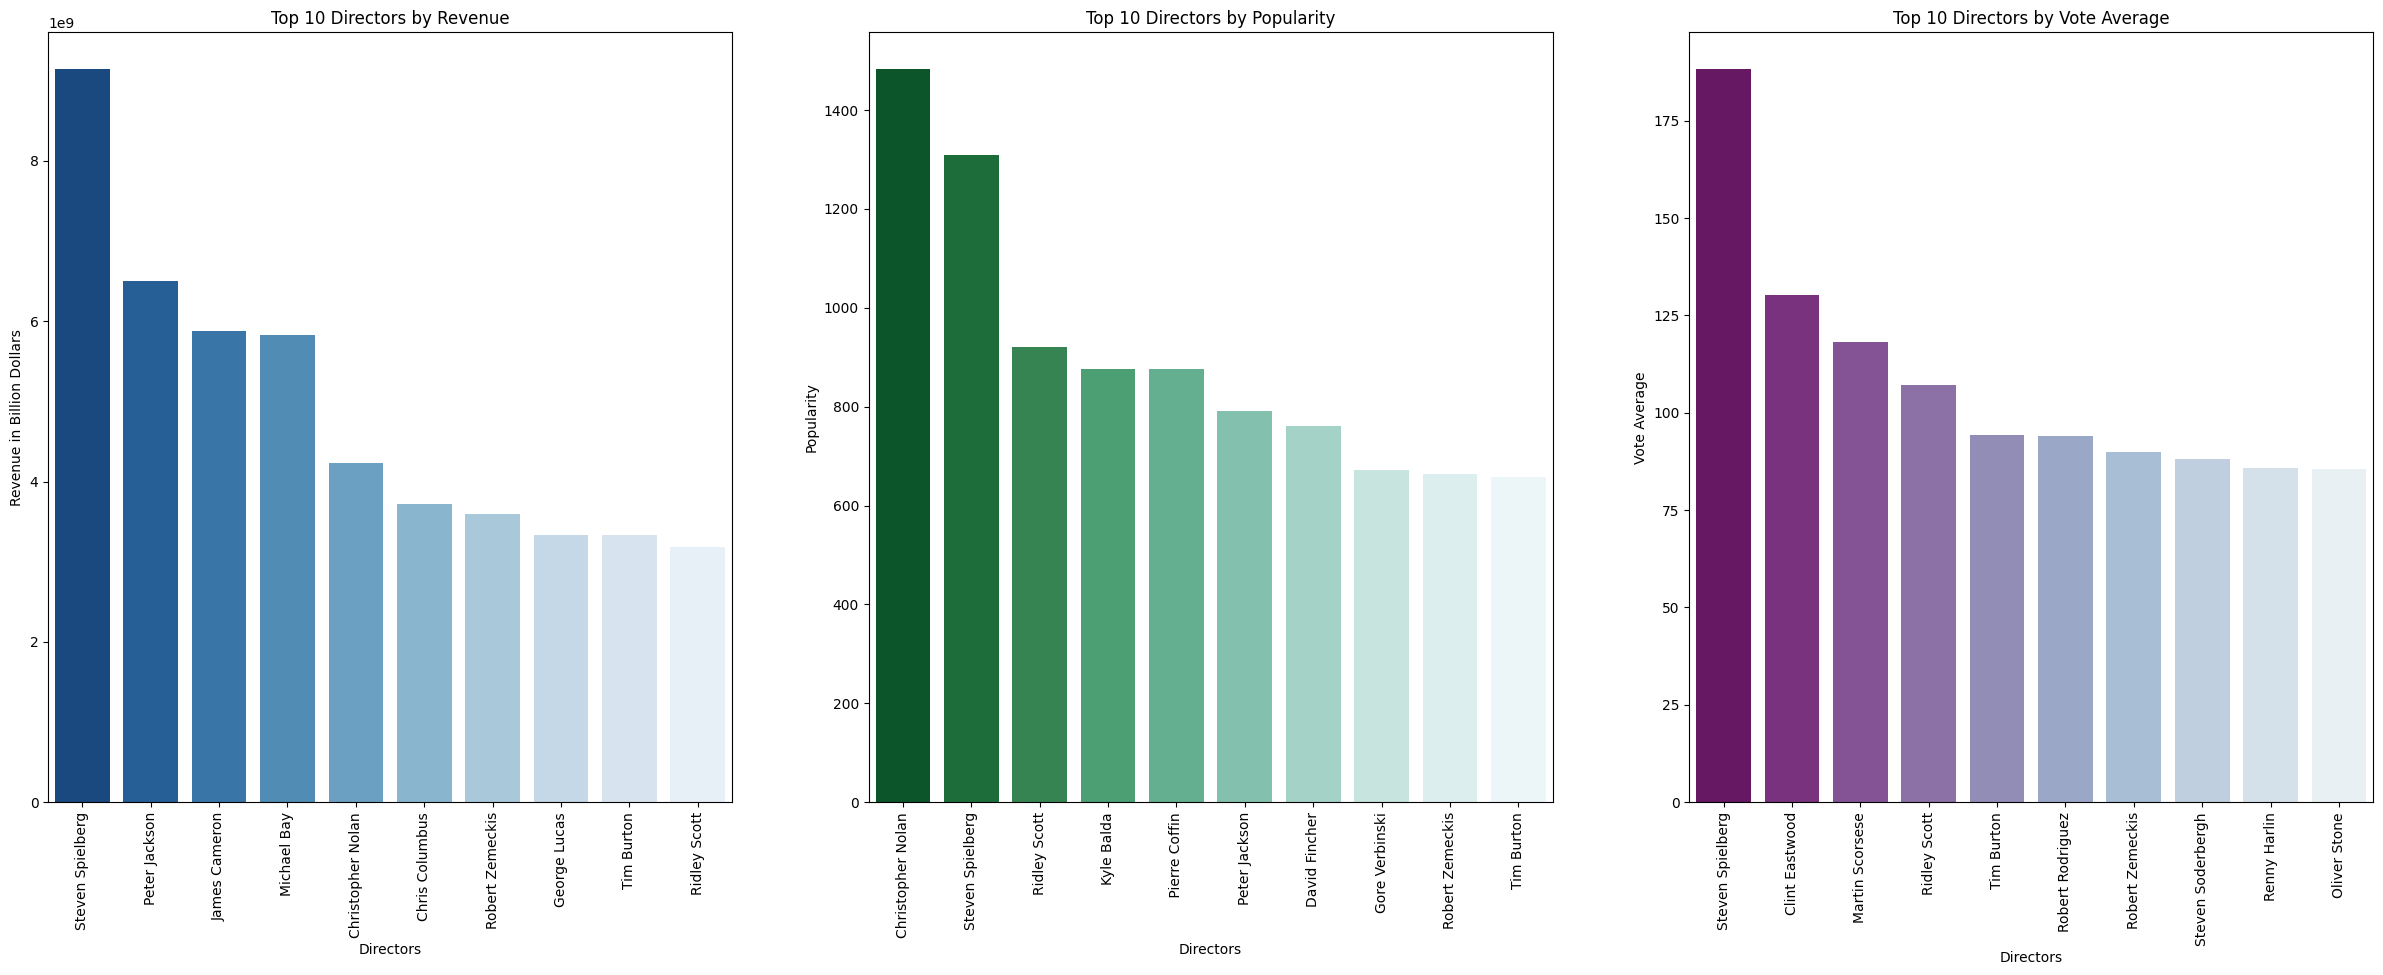

In [ ]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(30, 10))

fig_director_revenue10=sns.barplot(data=director_revenue10,x='Director',y='revenue',ax=axs[0],palette='Blues_r',hue='Director',legend=False)
axs[0].set_title('Top 10 Directors by Revenue')
axs[0].set_ylabel('Revenue in Billion Dollars')
axs[0].set_xlabel('Directors')
axs[0].tick_params(axis='x',rotation=90)

fig_director_popu10=sns.barplot(data=director_popu10,x='Director',y='popularity',ax=axs[1],palette='BuGn_r',hue='Director',legend=False)
axs[1].set_title('Top 10 Directors by Popularity')
axs[1].set_ylabel('Popularity')
axs[1].set_xlabel('Directors')
axs[1].tick_params(axis='x',rotation=90)

fig_director_voteavg10=sns.barplot(data=director_voteavg10,x='Director',y='vote_average',ax=axs[2],palette='BuPu_r',hue='Director',legend=False)
axs[2].set_title('Top 10 Directors by Vote Average')
axs[2].set_ylabel('Vote Average')
axs[2].set_xlabel('Directors')
axs[2].tick_params(axis='x',rotation=90)

#### 💡Key Insights

`Steven Spielberg` is definitely the best director. He directed so many famous movies like `Jurassic Park`, `Indiana Jones`, `E.T.`, `A.I.`, and `Schindler's List`, receiving both popularity and reputation. The same with `Tim Burton`, whose movies are featured by `Johnny Depp` with a dark Gothic style. `Christopher Nolan` is also a great director in terms of revenue and popularity. I personally favor his movies very much, especially `Interstella` and `Inception`. But his movies do not seem to be favored by voters. Interesting to notice that the directors with highest revenues have all directed some big franchises. `Peter Jackson` is the director of `The Lord of the Rings`; `James Cameron` directed `Avatar` and `Terminator`; `Micheal Bay` has `Transformers`.

###2.5 Who are the top producers with highest revenue and budget?

##### Temporary Dataframe for Producers, Revenue and Budget

In [ ]:
tempx = mergedata[['Producers','revenue','budget']]
tempx = tempx.groupby('Producers').sum()
tempx.sort_values(by=['revenue'], ascending=False, inplace=True)
tempx = tempx[1:21]
tempx.head(2)

,revenue,budget
Producers,,
Kevin Feige,7750439877,1570000000
"James Cameron, Jon Landau",4632999275,437000000


#### Stacked Bar Chart

Text(0, 0.5, 'Dollars in Billions')

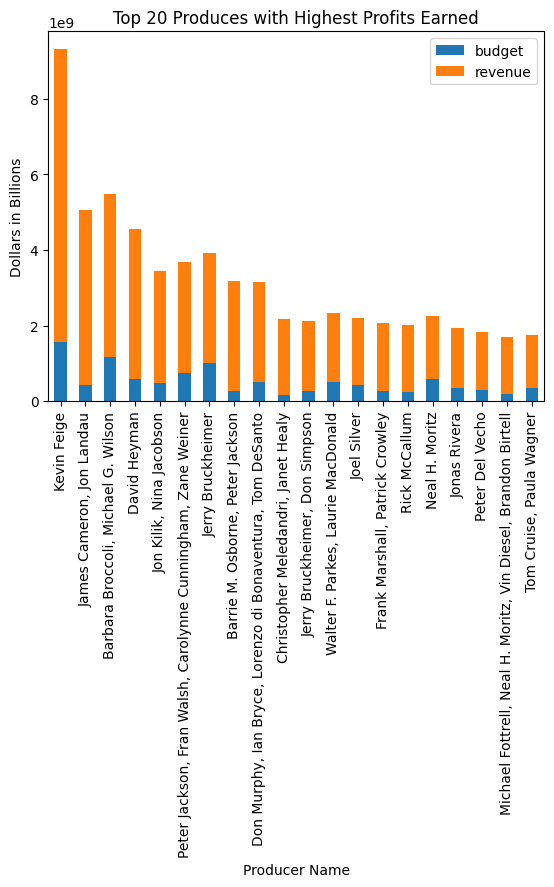

In [ ]:
tempx[['budget', 'revenue']].plot(kind="bar", stacked=True)
plt.title("Top 20 Produces with Highest Profits Earned")
plt.xlabel("Producer Name")
plt.ylabel("Dollars in Billions")

#### 💡Key Insights

Profitability is the most important thing a producer should consider. `Kevin Feige` is a legend in this area. Most people do not know his name but it will all make sense if I tell you he is the president of Marvel Studio. We can also see some famous directors like `James Cameron` and `Peter Jackson` on the list. An interesting phenominon is all of the budgets are under 2 billion dollars.

## 3. Comparisons:
  - How does the average vote count and vote average differ across genres?
  - What is the relationship between Average Vote Count and Average Ratings by each genre?

###3.1 How does the average vote count and vote average differ across genres?

In [ ]:
# Create a copy of the movies dataframe
genres_split = movies.copy()

# Split genres column into separate rows
genres_split['genres'] = genres_split['genres'].str.split(',')
genres_split = genres_split.explode('genres')
genres_split['genres'] = genres_split['genres'].str.strip()

# Group by genre and calculate mean values for vote_count and vote_average
genre_grouped = genres_split.groupby('genres').agg({'vote_count': 'mean', 'vote_average': 'mean'}).reset_index()

# Display the results
print(genre_grouped.sort_values(by='vote_count', ascending=True).to_string(index=False))

        genres  vote_count  vote_average
       Foreign    5.333333      6.566667
   Documentary  150.781250      6.853125
         Music  429.209091      6.520909
       History  642.118881      6.805594
       Romance  660.007092      6.355496
        Horror  697.756024      5.902410
        Comedy  765.178637      6.094843
         Drama  801.737288      6.606073
       Western  811.385965      6.671930
           War  899.500000      6.792500
         Crime  967.552124      6.445367
       Mystery 1003.596226      6.364151
      Thriller 1013.309677      6.209032
        Family 1230.102210      6.200552
        Action 1413.473047      6.135864
     Animation 1536.548387      6.477419
       Fantasy 1607.143695      6.171261
     Adventure 1700.593893      6.242443
ScienceFiction 1737.244186      6.165814


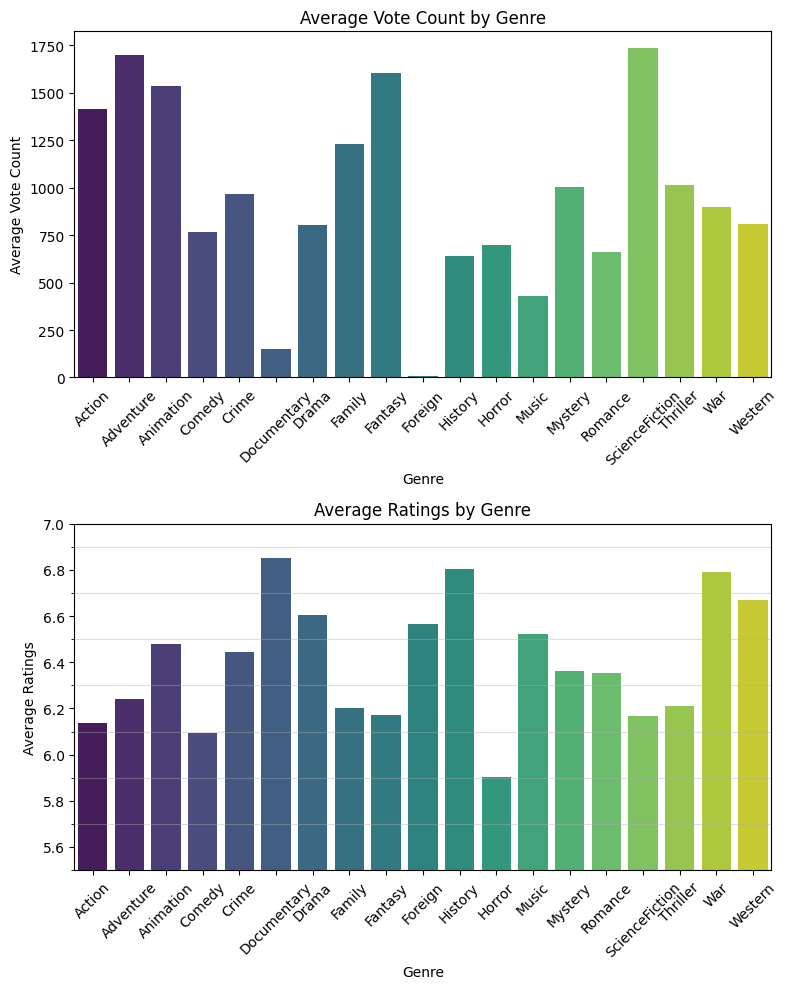

In [ ]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(2, 1, figsize=(8, 10))

sns.barplot(data=genre_grouped, x='genres', y='vote_count', ax=ax[0], palette='viridis', hue='genres', legend=False)
ax[0].set_title('Average Vote Count by Genre')
ax[0].set_ylabel('Average Vote Count')
ax[0].set_xlabel('Genre')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=genre_grouped, x='genres', y='vote_average', ax=ax[1], palette='viridis', hue='genres', legend=False)
ax[1].set_title('Average Ratings by Genre')
ax[1].set_ylabel('Average Ratings')
ax[1].set_xlabel('Genre')
ax[1].tick_params(axis='x', rotation=45)

# Custom minor ticks
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
ax[1].grid(axis='y', which='minor', alpha=0.4)

# Set y-axis limit
ax[1].set_ylim(5.5, 7)

plt.tight_layout()
plt.show()

#### 💡Key Insights

**Counts vs Ratings:** `Action` and `Adventure` have the highest average vote counts, indicating they are popular among viewers. `Documentary` has the highest average rating, suggesting that although it might not be as popular in terms of vote count, those who watch documentaries rate them highly.

**Variation:** The average vote count varies more across genres than the average rating. This means that some genres have more consistent ratings than others, regardless of their popularity.

**Outliers:** `Horror` has the lowest average rating among all listed genres, implying that it is not well-received by most viewers. `Foreign` has a low average vote count but a relatively high average rating, indicating that it has a niche audience who appreciate it.

###3.2 What is the relationship between average vote count and average ratings by each genre?

Pearson correlation coefficient: -0.50


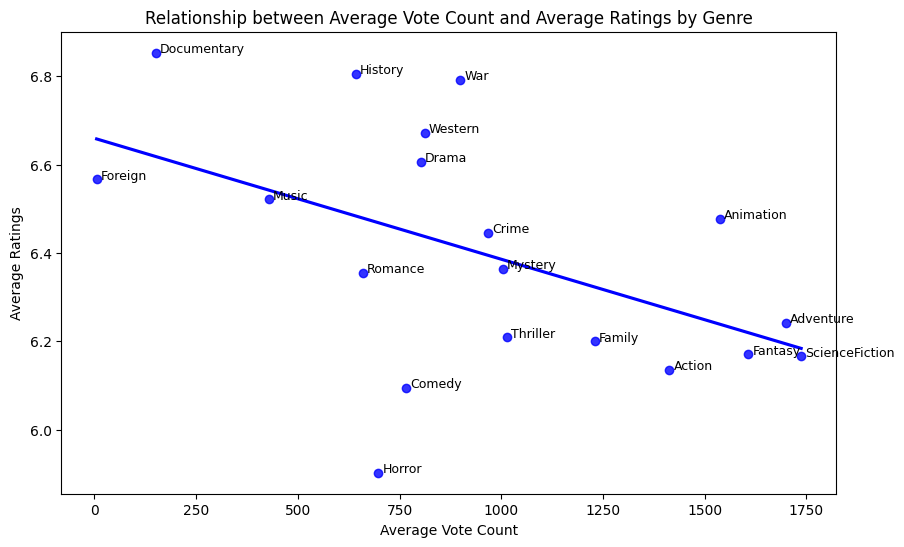

In [ ]:
from scipy.stats import pearsonr

plt.figure(figsize=(10, 6))

# Plot the scatter plot with a regression line
sns.regplot(data=genre_grouped, x='vote_count', y='vote_average', color='blue', ci=None)

plt.title('Relationship between Average Vote Count and Average Ratings by Genre')
plt.xlabel('Average Vote Count')
plt.ylabel('Average Ratings')

# Add genre labels to each point
for index, row in genre_grouped.iterrows():
    plt.text(row['vote_count'] + 10, row['vote_average'], row['genres'], fontsize=9)

# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(genre_grouped['vote_count'], genre_grouped['vote_average'])
print(f'Pearson correlation coefficient: {correlation:.2f}')

plt.show()

#### 💡Key Insights

Overall, average ratings and vote count is negatively correlated.

`Science Fiction` and `Action` movies have more votes, but they also receive more criticism. On the contrary, `Documentary` and `History` movies have fewer votes, but they might enjoy a more devoted and happy audience.

`Adventure` and `Fantasy` movies often receive more votes, but they also have high expectations to meet. `Western` and `War` movies have low vote counts, but they might surprise the viewers with their quality and originality.

High vote counts are common for `Comedy` and `Horror` movies, but they also have a lot of variation in terms of style, tone, and theme, which can influence the ratings. On the other hand, `Crime` and `Mystery` movies have low vote counts, but they might have a more consistent and suspenseful plot, which can increase the ratings.

## 4. Trends:
  - Are there any noticeable patterns or shifts in movie budgets, revenues, and popularity over time?
  - How has the number of movies released each year changed over time?

### 4.1 Are there any noticeable patterns or shifts in movie budgets, revenues, and popularity over time?


<ipython-input-48-32a414c93ac6>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = movies.groupby('release_year').mean().reset_index()
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (89). n_quantiles is set to n_samples.
  warnings.warn(


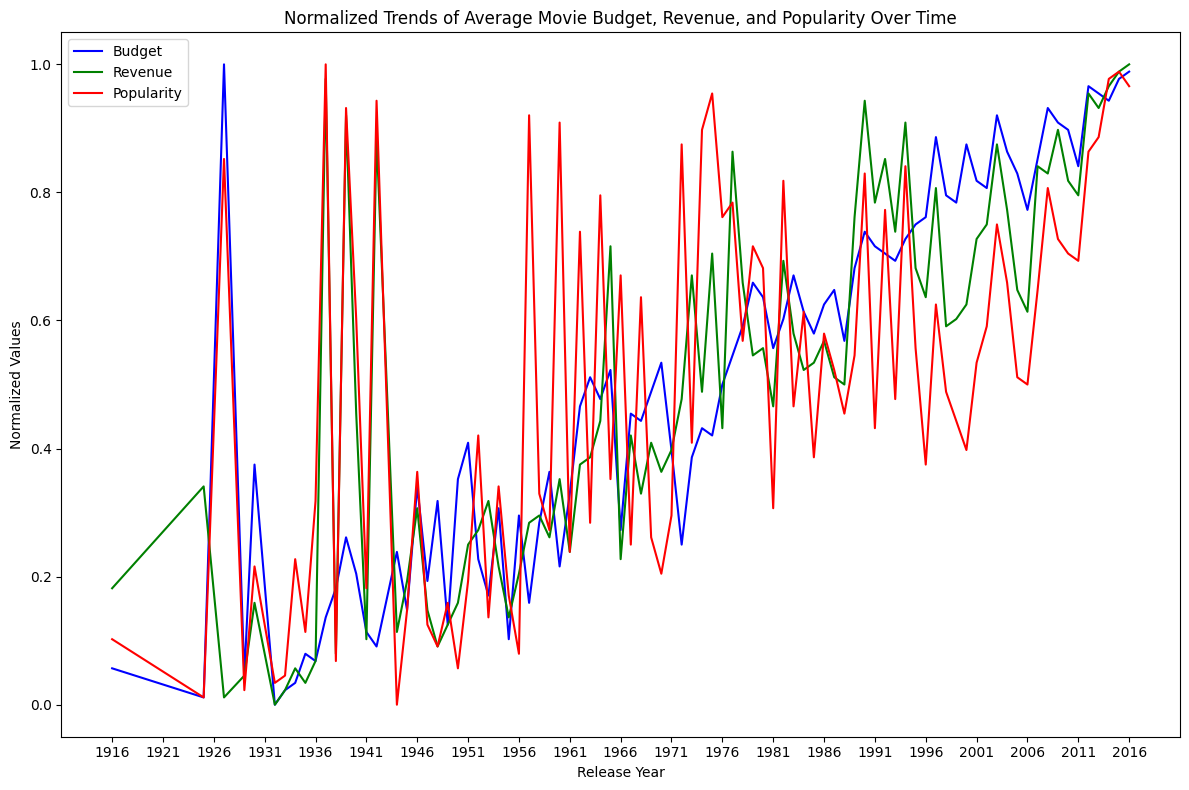

In [ ]:
# Extract release year from release_date
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

# Group by release year and calculate mean values
yearly_data = movies.groupby('release_year').mean().reset_index()

# Normalize the data
scaler = QuantileTransformer()
normalized_yearly_data = scaler.fit_transform(yearly_data[['budget', 'revenue', 'popularity']])
normalized_yearly_data = pd.DataFrame(normalized_yearly_data, columns=['budget', 'revenue', 'popularity'])
normalized_yearly_data['release_year'] = yearly_data['release_year']

# Plot the trends in movie budgets, revenues, and popularity over time
fig, ax = plt.subplots(figsize=(12, 8))

sns.lineplot(data=normalized_yearly_data, x='release_year', y='budget', ax=ax, label='Budget', color='blue')
sns.lineplot(data=normalized_yearly_data, x='release_year', y='revenue', ax=ax, label='Revenue', color='green')
sns.lineplot(data=normalized_yearly_data, x='release_year', y='popularity', ax=ax, label='Popularity', color='red')

ax.set_title('Normalized Trends of Average Movie Budget, Revenue, and Popularity Over Time')
ax.set_xlabel('Release Year')
ax.set_ylabel('Normalized Values')
ax.set_xticks(np.arange(yearly_data['release_year'].min(), yearly_data['release_year'].max() + 1, 5))

plt.legend()
plt.tight_layout()
plt.show()

#### 💡Key Insights

The graph shows that all three have experienced significant fluctuations but have generally increased over the years. Budgets and revenues appear to be more correlated with each other than with popularity.

###4.2 How has the number of movies released each year changed over time?

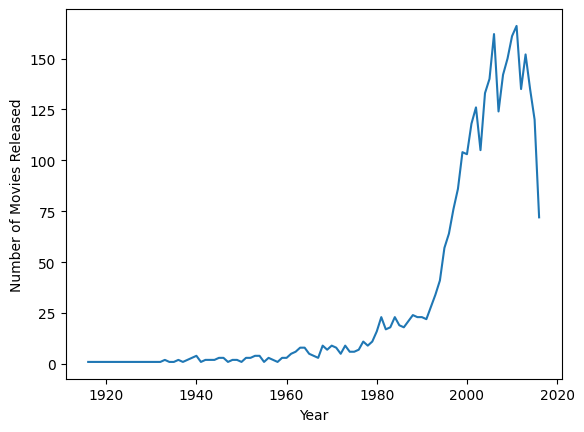

In [ ]:
# Extract the release year from the release date column
movies['release_year'] = pd.to_datetime(movies['release_date']).dt.year

# Count the number of movies released in each year
year_counts = movies['release_year'].value_counts().sort_index()

# Plot the number of movies released each year
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.show()

#### 💡Key Insights

The graph shows that the number of movies released each year has generally increased over time. There was a steady, slow increase from 1920 until around 1980. Post-1980, there was a significant spike in the number of movies being released annually, peaking around 2015 before experiencing some fluctuations.

Here are some possible factors that contributed to this trend:

**Technology:** Advances in technology, such as digital cameras, computer-generated imagery, and online streaming, have made movie production and distribution more accessible, affordable, and diverse.

**Demand:** The growth of the global population, the expansion of the international market, and the emergence of new genres and niches have increased the demand for movies and the variety of tastes and preferences among viewers.

**Competition:** The rise of alternative forms of entertainment, such as video games, social media, and podcasts, have increased the competition for movie makers and challenged them to produce more innovative and appealing content.

# 🔑F - Conclusion

In this project, we looked at the TMDB 5000 Movies Datasets. We cleaned the datasets by removing unnecessary columns, invalid and null values and transformed JSON string into Python string using functions and loops.

We started by looking at how the numbers relate to each other, especially with the success indicator revenue. We wanted to know what makes a movie successful. We found out that the most important things are how much money is spent on making the movie, how popular it is, and how many people vote for it. Then we compared different movies, genres, companies, directors, and producers based on revenue, popularity, and ratings. The movies that are part of big series are always very successful, and so are the genres like `Action` and `Adventure`. Some directors make a lot of money and are also famous, especially if they direct the big series movies. We also checked the ratings and votes for different genres and saw that some genres are liked by many people but have low ratings, while some genres are not very popular but have fans who really love them. Lastly, we looked at how things changed over time for the budget, revenue, popularity, and number of movies. They all went up over time, and there was a big jump in the number of movies in the 1980s.

I'm glad to know that my movie choices are not weird or boring, but actually quite common and profitable. I guess I have a lot in common with the majority of moviegoers. One thing that makes the big franchises so awesome, I think, is that they are like a blast of eye candy and ear candy, and they also make me feel like a superhero who can do anything.